# **MS9007 Practical Natural Language Processing**

# **Capstone Project**

### **Name:** Wong Qi Yuan, Jeffrey
### **Student ID:** P7359567

# **Project A: Disaster Tweet Classification**
---

## **Project Description:**
---

Your task is to classify a collection of tweet data as referring to either natural disasters or regular tweets using various NLP techniques.
This project will require preprocessing of the raw tweet data, including tokenization, stop word removal, stemming/lemmatization, and feature extraction. These preprocessing steps will help in converting the unstructured tweet text into a structured numerical format that can be processed by machine learning algorithms. The performance of the model will be evaluated using various metrics such as accuracy, precision, recall, and F1 score. Overall, this project can provide insights into how NLP techniques can be used to classify tweets related to natural disasters and regular tweets, which can aid in disaster response and management efforts. The dataset used for this project is called "Disaster_socialmedia.csv", which contains tweets related to natural disasters, as well as tweets that are not related to natural disasters.

## **What is the significance of the disaster tweet classification project?**
---

Uses a **voting classifier** for disaster tweet classification that improves the disaster management by accurately identifying relevant tweets from the social media, enabling efficient emergency response and resource mobilisation.


## **What is the objective of the disaster tweet classification project?**
---

To develop an accurate and less computational resources voting classifier to automatically classify disaster tweets, leveraging machine learning to save time and resources compared to manual classification.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## **1. Import libraries**
---

In [2]:
# install library
!pip install contractions
!pip install nltk
!pip install spacy
!pip install pandas
!pip install numpy
!pip install emoji
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=78cc25764c431a9972260ad0397621492167970a11aa86dabb492328f72c6728
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00


In [3]:
# GENERAL
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings("ignore")

# EDA
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

# NLP
import contractions
import emoji
import nltk
import spacy
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skopt import BayesSearchCV


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## **2. Dataset Preparation**
---

##### **2.1: Read CSV file**
---

Loads a CSV file into a DataFrame named disasters_df and then displays the first five rows of the data.

In [4]:
# create the file path
fpath = "/content/drive/My Drive/SDVLA/nlp/capstone_project/disasters_social_media.csv"
# read the csv file
disasters_df = pd.read_csv(fpath)
# display the first five rows of the data
disasters_df.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


##### **2.2: Display data information**
---

Display a summary of the **disasters_df** dataframe by using  the **info()** function.

In [5]:
# display an information of the disaster dataset
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10876 non-null  int64  
 1   _unit_id               10876 non-null  int64  
 2   _golden                10876 non-null  bool   
 3   _unit_state            10876 non-null  object 
 4   _trusted_judgments     10876 non-null  int64  
 5   _last_judgment_at      10792 non-null  object 
 6   choose_one             10876 non-null  object 
 7   choose_one:confidence  10876 non-null  float64
 8   choose_one_gold        87 non-null     object 
 9   keyword                10789 non-null  object 
 10  location               7238 non-null   object 
 11  text                   10876 non-null  object 
 12  tweetid                10876 non-null  float64
 13  userid                 10789 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(7)
memory usa

##### **2.3: Extract the relevant columns**
---

Create a new DataFrame called **disasters_df2** that contains only the **"keyword"** and **"text"** columns from the original **disasters_df** DataFrame and then displays the first 5 rows of the **disasters_df2** DataFrame.

In [6]:
# select the "keyword" and "text" columns and store it into a new variable
disasters_df2 = disasters_df[['keyword', 'text']]
# display 5 random rows in the dataset
disasters_df2.sample(5)

,keyword,text
1829,burned,This is why you should be burned at the stake ...
9667,tornado,**** GOODE Water Ski National Championships wi...
5218,fatality,So these savages leaked Thomas Brady gangsterm...
7904,radiation%20emergency,SB228 [Ped] Relating to sources of radiation; ...
2916,danger,My take away: preservation parks r an impositi...


##### **2.4: Creating a copy of a DataFrame**
---

Create a new copy of the **disasters_df2** and assigns it to a new variable **disasters_df2_copy** using the .**copy()** method.

In [7]:
# create another copy of the datafile
disasters_df2_copy = disasters_df2.copy()

## **3. Text Preprocessing**
---

**Text Preprocessing** tweets involves cleaning and transforming raw tweet data to make it more suitable for analysis or machine learning tasks. The purpose of preprocessing is to enhance the quality of the data, reduce noise, and extract relevant information, enabling better understanding and analysis of the content. Preprocessed tweets are easier to work with and can lead to more accurate results in various applications such as sentiment analysis, topic modeling, and trend analysis.

Pre-processing steps for tweets include elimination of empty rows, removing of URL/Hyperlinks, removing unusual text sequences, removing stopwords, removing user mentions, removing punctuations, removing non-ascii characters, handling contractions, handling emoji and emoticon, etc.

##### **3.1: Eliminate Empty Rows**
---

Remove any empty rows or tweets that do not contain any text or meaningful information. Empty rows do not contribute significant to the data anlysis can be safely excluded from the dataset.

In [8]:
# define a function to remove empty rows in the dataframe
def remove_empty_rows(dataframe):
  return dataframe.dropna(axis = 0, inplace = False)

In [9]:
# call the function to remove empty rows in the dataframe
disasters_df2_copy = remove_empty_rows(disasters_df2_copy)

##### **3.2: Case Handling**
---

Convert all the words in the tweets to lowercase. This is to ensures that the words with the same meaning but different cases are treated the same word. For example, "TSUNAMI" and "tsunami" will be considered identical after lowercasing.

In [10]:
# define a function to convert input text into lowercase
def lowercase_normalization(text):
  return text.lower()

In [11]:
# call the function to convert the input text and keyword into lowercase
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: lowercase_normalization(x))
disasters_df2_copy['keyword'] = disasters_df2_copy['keyword'].apply(lambda x: lowercase_normalization(x))

##### **3.3: User Mentions Removal (i.e. @XXXX)**
---

Remove user mentions (i.e. @BillGates) that do not provide useful information for the analysis and to minimise the noise contribution.

In [12]:
# define a function to remove the twitter handle from the input text
def remove_twitter_handle(text):
  return re.sub(r'@\w+', '', text)

In [13]:
# call the function to remove twitter handle in the text column values of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_twitter_handle(x))

##### **3.4: Unusual Text Sequences Removal/ Replacement**
---

Remove unusual text sequences, such as repeated words like "loooool", "kkkkkkkk", and non-separated words like "fusionfestival", etc. These sequences are often used for emphasis or elongation in informal writing but may not contribute to the overall analysis or machine learning tasks.

In [14]:
# define a function to remove unusal text sequences from the input text
def remove_unusual_text_sequences(text):
  text = re.sub(r'&[^ ]+','', text) # remove #amp, etc
  text = re.sub(r'[h]{1}a[ha]+', '', text) # remove hahaha, haha, etc
  text = re.sub(r'so+', '', text) # replace sooooooo to so
  text = re.sub(r'coo+l', '', text) # replace cooool to cool
  text = re.sub(r'lo+l', '', text) # replace looool to lol
  text = re.sub(r'k+', '', text)# remove kkkkkk
  text = re.sub(r'&gt', 'greater than', text) # replace &gt to greater than
  text = re.sub(r'&lt', 'less than', text) # replace &lt to less than
  text = re.sub(r'w/e', 'whatever', text) # replace w/e to whatever
  text = re.sub(r'w/', 'with', text) # replace w/ to with
  text = re.sub(r'ph0tos', 'photos', text) # replace the correct word
  text = re.sub(r'amirite', 'am i right', text) # replace the correct sentence
  text = re.sub(r'ex0posed', 'exposed', text) # replace the correct word
  text = re.sub(r'tramatised', 'tramatized', text)
  text = re.sub(r'recentlu', 'recently', text)
  text = re.sub(r'USAgov', 'USA government', text)
  text = re.sub(r'MH370', 'Malaysian Arilines Flight 370', text)
  text = re.sub(r'icouldsitinthismomentforever', 'i could sit in this moment forever', text)
  text = re.sub(r'debatequestionswewanttohear', 'debate questions we want to hear', text)
  text = re.sub(r'gofundme', 'go fund me', text)
  text = re.sub(r'pmharper', 'stephen harper', text)
  text = re.sub(r'alllivesmatter', 'all lives matter', text)
  text = re.sub(r'cdcgov', 'centers for disease control and prevention', text)
  text = re.sub(r'foxnew', 'fox new', text)
  text = re.sub(r'thatswhatfriendsarefor', 'that is what friends are for', text)
  text = re.sub(r'whatstheimportantvideo', 'what is the important video', text)
  text = re.sub(r'offdishduty', 'off dish duty', text)
  text = re.sub(r'getitbeforeitsgone', 'get it before it is gone', text)
  text = re.sub(r'freshoutofthebox', 'fresh out of the box', text)
  text = re.sub(r'pray4japan', 'pray for japan', text)
  text = re.sub(r'hope4japan', 'hope for japan', text)
  text = re.sub(r'icouldsitinthismomentforever', 'I could sit in this moment forever', text)
  text = re.sub(r'fatloss', 'fat loss', text)
  text = re.sub(r'ithats', 'that is', text)
  text = re.sub(r'bstrd', 'bastard', text)
  text = re.sub(r'bldy', 'bloody', text)
  text = re.sub(r'bbcnewsasia', 'bbc news asia', text)
  text = re.sub(r'survivorsguidetoearth', 'survivors guide to earth', text)
  text = re.sub(r'babypicturethis', 'baby picture this', text)
  text = re.sub(r'bombeffects', 'bomb effects', text)
  text = re.sub(r'thewalkingdead', 'the walking dead', text)
  text = re.sub(r'crewlist', 'crew list', text)
  text = re.sub(r'bbclive', 'bbc live', text)
  text = re.sub(r'pctool', 'pc tool', text)
  text = re.sub(r'doinghashtagsright', 'doing has tags right', text)
  text = re.sub(r"writerslife", "writers life", text)
  text = re.sub(r"naturalbirth", "natural birth", text)
  text = re.sub(r"unusualwords", "unusual words", text)
  text = re.sub(r"wizkhalifa", "Wiz Khalifa", text)
  text = re.sub(r"acreativedc", "a creative dc", text)
  text = re.sub(r"vscodc", "vsco dc", text)
  text = re.sub(r"vscocam", "vsco camera", text)
  text = re.sub(r"thebeachdc", "the beach dc", text)
  text = re.sub(r"buildingmuseum", "building museum", text)
  text = re.sub(r"worldoil", "world oil", text)
  text = re.sub(r"redwedding", "red wedding", text)
  text = re.sub(r"amazingaacecanada", "amazing race canada", text)
  text = re.sub(r"wakeupamerica", "aake up america", text)
  text = re.sub(r"\\allahuakbar\\", "allahu akbar", text)
  text = re.sub(r"bleased", "blessed", text)
  text = re.sub(r"hideo_kojima_en", "hideo kojima", text)
  text = re.sub(r"fusionfestival", "fusion festival", text)
  text = re.sub(r"50mixed", "50 mixed", text)
  text = re.sub(r"noagenda", "no agenda", text)
  text = re.sub(r"whitegenocide", "white genocide", text)
  text = re.sub(r"dirtylying", "dirty lying", text)
  text = re.sub(r"syrianrefugees", "syrian refugees", text)
  text = re.sub(r"changetheworld", "change the world", text)
  text = re.sub(r"ebolacase", "ebola case", text)
  text = re.sub(r"mcgtech", "mcg technologies", text)
  text = re.sub(r"withweapons", "with weapons", text)
  text = re.sub(r"advancedwarfare", "advanced warfare", text)
  text = re.sub(r"letsfootball", "let us football", text)
  text = re.sub(r"latenitemix", "late night mix", text)
  text = re.sub(r"philcollinsfeed", "phil collins", text)
  text = re.sub(r"rudyravenstein", "rudy havenstein", text)
  text = re.sub(r"oldfolkexplainstuff", "old folk explain stuff", text)
  text = re.sub(r"blacklivesmatter", "black lives matter", text)
  text = re.sub(r"insanelimits", "insane limits", text)
  text = re.sub(r"youcantsitwithus", "you cannot sit with us", text)
  text = re.sub(r"theiran", "iran", text)
  text = re.sub(r"jimmyfallon", "jimmy fallon", text)
  text = re.sub(r"albertbrooks", "albert brooks", text)
  text = re.sub(r"defense_news", "defense news", text)
  text = re.sub(r"nuclearrcsa", "nuclear risk control self assessment", text)
  text = re.sub(r"auspol", "australia politics", text)
  text = re.sub(r"nuclearpower", "nuclear power", text)
  text = re.sub(r"whiteterrorism", "white terrorism", text)
  text = re.sub(r"truthfrequencyradio", "truth frequency radio", text)
  text = re.sub(r"erasureisnotequality", "erasure is not equality", text)
  text = re.sub(r"probononews", "pro bono news", text)
  text = re.sub(r"jakartapost", "jakarta post", text)
  text = re.sub(r"toopainful", "too painful", text)
  text = re.sub(r"melindahaunton", "melinda haunton", text)
  text = re.sub(r"nonukes", "no nukes", text)
  text = re.sub(r"curryspcworld", "currys pc world", text)
  text = re.sub(r"ineedcake", "i need cake", text)
  text = re.sub(r"blackforestgateau", "black forest gateau", text)
  text = re.sub(r"bbcone", "bbc one", text)
  text = re.sub(r"alexxpage", "alex page", text)
  text = re.sub(r"jonathanserrie", "jonathan serrie", text)
  text = re.sub(r"socialjerkblog", "social jerk blog", text)
  text = re.sub(r"chelseavperetti", "chelsea peretti", text)
  text = re.sub(r"irongiant", "iron giant", text)
  text = re.sub(r"ronfunches", "ron funches", text)
  text = re.sub(r"timcook", "tim cook", text)
  text = re.sub(r"sebastianstanisaliveandwell", "sebastian stan is alive and well", text)
  text = re.sub(r"madsummer", "mad summer", text)
  text = re.sub(r"nowyouknow", "now you know", text)
  text = re.sub(r"concertphotography", "concert photography", text)
  text = re.sub(r"tomLandry", "tom landry", text)
  text = re.sub(r"showgirldayoff", "show girl day off", text)
  text = re.sub(r"yougslavia", "yugoslavia", text)
  text = re.sub(r"quantumdatainformatics", "quantum data informatics", text)
  text = re.sub(r"fromthedesk", "from the desk", text)
  text = re.sub(r"theatertrial", "theater trial", text)
  text = re.sub(r"catoinstitute", "cato institute", text)
  text = re.sub(r"emekagift", "emeka gift", text)
  text = re.sub(r"letsbe_rational", "let us be rational", text)
  text = re.sub(r"cynicalreality", "cynical reality", text)
  text = re.sub(r"fredOlsencruise", "fred olsen cruise", text)
  text = re.sub(r"notsorry", "not sorry", text)
  text = re.sub(r"useyourwords", "use your words", text)
  text = re.sub(r"wordoftheday", "word of the day", text)
  text = re.sub(r"dictionarycom", "dictionary.com", text)
  text = re.sub(r"thetrooklynlife", "the brooklyn life", text)
  text = re.sub(r"jokethey", "joke they", text)
  text = re.sub(r"nflweek1picks", "nfl week 1 picks", text)
  text = re.sub(r"uiseful", "useful", text)
  text = re.sub(r"justicedotorg", "the american association for justice", text)
  text = re.sub(r"autoaccidents", "auto accidents", text)
  text = re.sub(r"stevegursten", "steve gursten", text)
  text = re.sub(r"michiganautolaw", "michigan auto law", text)
  text = re.sub(r"birdgang", "bird gang", text)
  text = re.sub(r"nflnetwork", "nfl network", text)
  text = re.sub(r"nydnsports", "new york daily news sports", text)
  text = re.sub(r"rvacchianonydn", "ralph vacchiano new york Daily News", text)
  text = re.sub(r"edmontonesks", "edmonton eskimos", text)
  text = re.sub(r"david_brelsford", "david brelsford", text)
  text = re.sub(r"toi_india", "the times of india", text)
  text = re.sub(r"hegot", "he got", text)
  text = re.sub(r"skinson9", "skins on 9", text)
  text = re.sub(r"sothathappened", "so that happened", text)
  text = re.sub(r"lcoutofdoors", "lc out of doors", text)
  text = re.sub(r"nationfirst", "nation first", text)
  text = re.sub(r"indiatoday", "india today", text)
  text = re.sub(r"hlps", "helps", text)
  text = re.sub(r"hostagesthrow", "hostages throw", text)
  text = re.sub(r"snctions", "sanctions", text)
  text = re.sub(r"bidtime", "Bid Time", text)
  text = re.sub(r"crunchysensible", "crunchy sensible", text)
  text = re.sub(r"randomactsofromance", "random acts of romance", text)
  text = re.sub(r"momentsathill", "moments at hill", text)
  text = re.sub(r"eatshit", "eat shit", text)
  text = re.sub(r"liveleakfun", "live leak fun", text)
  text = re.sub(r"sahelnews", "sahel news", text)
  text = re.sub(r"abc7newsbayarea", "abc 7 news bay area", text)
  text = re.sub(r"facilitiesmanagement", "facilities management", text)
  text = re.sub(r"facilitydude", "facility dude", text)
  text = re.sub(r"camplogistics", "camp logistics", text)
  text = re.sub(r"alaskapublic", "alaska public", text)
  text = re.sub(r"marketresearch", "market research", text)
  text = re.sub(r"accuracyesports", "accuracy esports", text)
  text = re.sub(r"thebodyshopaust", "the body shop australia", text)
  text = re.sub(r"yychail", "calgary hail", text)
  text = re.sub(r"yyctraffic", "calgary traffic", text)
  text = re.sub(r"eliotschool", "eliot school", text)
  text = re.sub(r"thebrokencity", "the broken city", text)
  text = re.sub(r"oldsfiredept", "dlds fire department", text)
  text = re.sub(r"rivercomplex", "river complex", text)
  text = re.sub(r"fieldworksmells", "field work smells", text)
  text = re.sub(r"iranelection", "iran election", text)
  text = re.sub(r"glowng", "glowing", text)
  text = re.sub(r"kindlng", "kindling", text)
  text = re.sub(r"riggd", "rigged", text)
  text = re.sub(r"slownewsday", "slow news day", text)
  text = re.sub(r"myanmarflood", "myanmar flood", text)
  text = re.sub(r"abc7chicago", "ABC 7 Chicago", text)
  text = re.sub(r"copolitics", "colorado politics", text)
  text = re.sub(r"adilghumro", "adil ghumro", text)
  text = re.sub(r"netbots", "net bots", text)
  text = re.sub(r"byebyeroad", "bye bye road", text)
  text = re.sub(r"massiveflooding", "massive flooding", text)
  text = re.sub(r"endofus", "end of united states", text)
  text = re.sub(r"greektheatrela", "greek theatre los angeles", text)
  text = re.sub(r"publicsafetyfirst", "public safety first", text)
  text = re.sub(r"livesmatter", "lives matter", text)
  text = re.sub(r"myhometown", "my hometown", text)
  text = re.sub(r"tankerfire", "tanker fire", text)
  text = re.sub(r"memorialday", "memorial day", text)
  text = re.sub(r"memorial_day", "memorial day", text)
  text = re.sub(r"instaxbooty", "instagram booty", text)
  text = re.sub(r"jerusalem_post", "jerusalem post", text)
  text = re.sub(r"waynerooney_ina", "wayne rooney", text)
  text = re.sub(r"virtualreality", "virtual reality", text)
  text = re.sub(r"oculusrift", "cculus rift", text)
  text = re.sub(r"owenjones84", "owen jones", text)
  text = re.sub(r"jeremycorbyn", "jeremy corbyn", text)
  text = re.sub(r"paulrogers002", "paul rogers", text)
  text = re.sub(r"mortalkombatx", "mortal kombat x", text)
  text = re.sub(r"mortalkombat", "mortal kombat", text)
  text = re.sub(r"filipecoelho92", "filipe coelho", text)
  text = re.sub(r"onlyquakenews", "only quake news", text)
  text = re.sub(r"kostumes", "costumes", text)
  text = re.sub(r"yeeessss", "yes", text)
  text = re.sub(r"toshikazukatayama", "toshikazu katayama", text)
  text = re.sub(r"intldevelopment", "internal development", text)
  text = re.sub(r"extremeweather", "extreme weather", text)
  text = re.sub(r"werenotgrubervoters", "we are not gruber voters", text)
  text = re.sub(r"newsthousands", "news thousands", text)
  text = re.sub(r"edmundadamus", "edmund adamus", text)
  text = re.sub(r"eyewitnesswv", "eye witness wv", text)
  text = re.sub(r"alltheway80s", "all the way 80s", text)
  text = re.sub(r"fromTthefield", "from the field", text)
  text = re.sub(r"willowfire", "willow fire", text)
  text = re.sub(r"madrivercomplex", "mad river complex", text)
  text = re.sub(r"feelingmanly", "feeling manly", text)
  text = re.sub(r"stillnotoverit", "still not over it", text)
  text = re.sub(r"fortitudevalley", "fortitude valley", text)
  text = re.sub(r"coastpowerlinetramtr", "coast powerline", text)
  text = re.sub(r"servicesgold", "services gold", text)
  text = re.sub(r"newsbrokenemergency", "news broken emergency", text)
  text = re.sub(r"evaucation", "evacuation", text)
  text = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", text)
  text = re.sub(r"p_eople", "PEOPLE", text)
  text = re.sub(r"tubestrike", "tube strike", text)
  text = re.sub(r"class_sick", "class sick", text)
  text = re.sub(r"localplumber", "local plumber", text)
  text = re.sub(r"awesomejobsiri", "awesome job siri", text)
  text = re.sub(r"payforithow", "pay for it how", text)
  text = re.sub(r"thisIsafrica", "this is africa", text)
  text = re.sub(r"crimeairnetwork", "crime air network", text)
  text = re.sub(r"cityofcalgary", "city of calgary", text)
  text = re.sub(r"prosyndicate", "pro syndicate", text)
  text = re.sub(r"660news", "660 news", text)
  text = re.sub(r"businsmagazine", "business insurance magazine", text)
  text = re.sub(r"wfocus", "focus", text)
  text = re.sub(r"shastadam", "shasta dam", text)
  text = re.sub(r"go2markfranco", "mark franco", text)
  text = re.sub(r"stephghinojosa", "steph hinojosa", text)
  text = re.sub(r"nashgrier", "nash grier", text)
  text = re.sub(r"nashNewVideo", "nash new video", text)
  text = re.sub(r"iwouldntgetelectedbecause", "i would not get elected because", text)
  text = re.sub(r"shgames", "sledgehammer games", text)
  text = re.sub(r"bedhair", "bed hair", text)
  text = re.sub(r"joelheyman", "joel heyman", text)
  text = re.sub(r"viayoutube", "via youtube", text)
  text = re.sub(r"newnewnew", "new new new", text)
  text = re.sub(r"under50", "under 50", text)
  text = re.sub(r"amwriting", "am writing", text)
  text = re.sub(r"bokoharm", "boko haram", text)
  text = re.sub(r"nowlike", "now like", text)
  text = re.sub(r"seasonfrom", "season from", text)
  text = re.sub(r"epicente", "epicenter", text)
  text = re.sub(r"epicenterr", "epicenter", text)
  text = re.sub(r"sicklife", "sick life", text)
  text = re.sub(r"yycweather", "calgary weather", text)
  text = re.sub(r"calgarysun", "calgary sun", text)
  text = re.sub(r"approachng", "approaching", text)
  text = re.sub(r"evng", "evening", text)
  text = re.sub(r"earthquae", "earthquake", text)
  text = re.sub(r"brea", "break", text)
  text = re.sub(r"onbeingwithristatippett", "on being with krista tippett", text)
  return text

In [15]:
# call the function to remove the unusual text sequences in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_unusual_text_sequences(x))

##### **3.5: URL/ Hyperlinks Removal**
---

Remove URLs/ Hyperlinks from the tweets. URLs and hyperlinks are typically do not provide useful information for analysis and can be considered noise.

In [16]:
# define a function to remove url/ hyperlinks from the input text
def remove_url_hyperlinks(text):
  return re.sub(r"http\S+|www\S+|https\S+", '', text)

In [17]:
# call the function to remove URLs starting with 'http' or 'https' in the text and keyword columns of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_url_hyperlinks(x))
disasters_df2_copy['keyword'] = disasters_df2_copy['keyword'].apply(lambda x: remove_url_hyperlinks(x))

##### **3.6: Abbreviation Months Removal**
---

Remove abbreviation months like "jan", "may", etc, from the tweets. This help simplify the text and focus on other essential information.

In [18]:
# define a function to remove the month abbreviations from the input text
def remove_months_abbre(text):
  return re.sub(r"jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec", '', text)

In [19]:
# call the function to remove month abbreviations such as jan, feb, mar, etc, in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_months_abbre(x))

##### **3.7: Newline Character Removal**
---

Remove any newline characters or line breaks from the tweet text. Newlines are often used to format text visually but do not carry specific meaning in the textual content. Removing them helps ensure consistency in the structure of the text and avoids introducing unnecessary variations.



In [20]:
# define a function to remove newline character from the input text
def remove_newline_char(text):
  return re.sub(r'\n', '', text)

In [21]:
# call the function to remove newline character (i.e. \n) in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_newline_char(x))

##### **3.8: non-ASCII Characters Removal**
---

Remove any characters that are not part of the ASCII character set. Non-ASCII characters may include special characters from different languages or symbols that are not typically used in English text. Removing them helps ensure that the text is encoded consistently and avoids potential encoding issues during analysis or machine learning tasks.

In [22]:
# define a function to remove non-ascII characters from the input text
def remove_non_ascii_char(text):
  return re.sub(r'[^\x00-\x7F]+', '', text)

In [23]:
# call the function to remove non-ascII characters in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_non_ascii_char(x))

##### **3.9: Handling Contractions**
---

Expand contractions to their full forms. Contractions are shortened versions of words where one or more letters are replaced with an apostrophe. For instance, "can't" can be expanded to "cannot," "won't" to "will not," "I'm" to "I am," etc. Expanding contractions helps standardize the representation of words and ensures consistency in the text.

In [24]:
# define a function to expand the contractions
def contractions_expansion(text):
  return contractions.fix(text)

In [25]:
# call the function to expand the contractions in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: contractions_expansion(x))

##### **3.10: Handling Emoji and Emoticon**
---

Remove emojis and emoticons from the tweet text. Emojis are pictorial representations of emotions, objects, or symbols, while emoticons are textual representations of facial expressions or emotions. Removing them helps simplify the text and focuses on the textual content rather than graphical elements. You can replace emojis and emoticons with a placeholder text or simply remove them altogether.

In [26]:
import emoji

# define a function to convert emoji and emoticon to words
def convert_emoji_emoticon_to_words(text):

  emoticon_dict = {
    ":)": "happy",
    ":D": "laughing",
    ":(": "sad",
    ":|": "neural",
    ":P": "tongue out",
    ";)": "winking",
    "<3": "love",
    ":O": "surprised",
    ":/": "confused",
    ":*": "kissing",
    ":')": "tears of joy",
    ":@": "angry",
    ":S": "confused",
    ">:(": "angry",
    ":|": "indifferent",
    ":$": "embarrased",
    ":^)": "raised eyebrow",
    "B-)": "cool",
    "O:)": "angel",
    ":3": "cute",
    "-_-": "bored"}
  # convert emojis to text representation
  converted_text = emoji.demojize(text)
  # replace emoticons with their corresponding words
  for emoticon, text_rep in emoticon_dict.items():
    converted_text = converted_text.replace(emoticon, text_rep)
  # return the converted text
  return converted_text

In [27]:
# call the function to apply the emojis and emoticons conversion in text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: convert_emoji_emoticon_to_words(x))

##### **3.11: Punctuations Removal**
---

Remove punctuation marks such as commas, periods, question marks, exclamation marks, etc., from the tweet text. Punctuation marks do not usually carry significant meaning in the textual content and can be safely removed.

In [28]:
# define a function to remove punctuations from input text
def remove_punctuations(text):
  text_no_punctuations = ''.join([' ' if char in string.punctuation else char for char in text]) # replace punctuations with space
  return text_no_punctuations # return the text without punctuations

In [29]:
# call the function to remove the punctuations in the text column and the keyword column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_punctuations(x))
disasters_df2_copy['keyword'] = disasters_df2_copy['keyword'].apply(lambda x: remove_punctuations(x))

##### **3.12: Handling Abbreviations**
---

Expand or replace common abbreviations or acronyms with their full forms. For example, "brb" can be expanded to "be right back." This step helps in improving the understanding of the text and ensuring consistent representation of words.

In [30]:
# create a set of abbreviation dictionary
abbreviation_dict = {'afaik': 'as far as i know',
                  'afk': 'from keyboard',
                  'a3': 'anytime, anywhere, anyplace',
                  'azwx': 'arizona weather',
                  'alwx': 'alabama weather',
                  'bbl': 'be back later',
                  'asap': 'as soon as possible',
                  'arwx': 'arkansas weather',
                  'atm': 'at the moment',
                  'bbs': 'be back soon',
                  'bfn': 'bye for now',
                  'b4n': 'bye for now',
                  'brb': 'be right back',
                  'brt': 'be right there',
                  'btw': 'by the way',
                  'b4': 'before',
                  'bcuz': 'because',
                  'cawx': 'california weather',
                  'cu': 'see you',
                  'cul8r': 'see you later',
                  'cya': 'see you',
                  'dtn': 'dont trust no one',
                  'faq': 'frequently asked questions',
                  'fav': 'favourite',
                  'fc': 'fingers crossed',
                  'fwiw': 'for what its worth',
                  'fyi': 'for your information',
                  'gawx': 'georgia weather',
                  'gmmbc': 'greater mt moriah baptist church',
                  'gal': 'get a life',
                  'gg': 'good game',
                  'gn': 'good night',
                  'gmta': 'great minds think alike',
                  'gr8': 'great!',
                  'g9': 'genius',
                  'gv': 'give',
                  'ic': 'i see',
                  'icq': 'i seek you',
                  'ilu': 'i love you',
                  'imho': 'in my honest/ humble opinion',
                  'imo': 'in my opinion',
                  'iow': 'in other words',
                  'irl': 'in real life',
                  'kiss': 'keep it simple, stupid',
                  'ldr': 'long distance relationship',
                  'lmao': 'laughing my ass off',
                  'lol': 'laughing out loud',
                  'ltns': 'long time no see',
                  'l8r': 'later',
                  'mte': 'my thoughts exactly',
                  'm8': 'mate',
                  'nrn': 'no reply necessary',
                  'oic': 'oh i see',
                  'pio': 'public information officier',
                  'pita': 'pain in the a..',
                  'prt': 'party',
                  'rofl': 'rolling on the floor laughing',
                  'roflol': 'rolling on the floor laughing out loud',
                  'rotflmao': 'rolling on the floor laughing my ass off',
                  'stats': 'your sex and age',
                  'scwx': 'south carolina weather',
                  'suruc': 'sanliurfa',
                  'asl': 'age, sex, location',
                  'thx': 'thank you',
                  'ttfn': 'bye',
                  'ttyl': 'talk to you later',
                  'twp': 'township',
                  'trfc': 'traffic',
                  'tnwx': 'tennessee weather',
                  'u': 'you',
                  'u2': 'you too',
                  'u4e': 'yours for ever',
                  'usnwsgov': 'united states national weather service',
                  'wanna': 'want to',
                  'wb': 'welcome back',
                  'wtf': "what the heck",
                  'wtg': 'way to go!',
                  'wuf': 'where are you from?',
                  'w8': 'wait',
                  '7k': 'sick laugher',
                  'yay': 'joy',
                  'yr': 'year',
                  'nyt': 'new york times'}

In [31]:
# define a function to convert the abbreviation from the input text
def abbreviation_conversion(text):
  newText = ""
  for word in text.split(" "):
    if word in abbreviation_dict.keys(): # check if the word is in the abbreviation dcitionary
      newText += abbreviation_dict[word] + " " # if it is, replace the word with its corresponding abbreviations text representation
    else:
      newText += word + " " # if not, keep the word as is
  return newText # return the converted text

In [32]:
# call the function to apply the abbreviation conversion in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: abbreviation_conversion(x))

##### **3.13: Digits Removal**
---

Remove digits from the tweet text. Digits often do not carry significant meaning in the textual content and can be safely removed.

In [33]:
# define a function to remove digits from the input text
def remove_digits(text):
  return re.sub(r"\d+", '', text)

In [34]:
# call the function to remove digits in the text column and keyword column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_digits(x))
disasters_df2_copy['keyword'] = disasters_df2_copy['keyword'].apply(lambda x: remove_digits(x))

##### **3.14: Stopwords Removal**
---

Remove common stopwords such as "and," "the," "is," etc., from the tweet text. Stopwords are frequently used but often do not contribute much to the overall meaning of the text. Removing them helps focus on more meaningful words and improves the quality of analysis or machine learning tasks.



In [35]:
def updated_stopwords():
  # load the existing set of stopwords
  stopwordsList = list(stopwords.words("english"))
  # additional stopwords to append
  additional_stopwords = ['via','like','build','get','would','one','two','feel',
                'fuck','take','way','may','first','latest','want',
                'make','back','see','know','let','look','come','got',
                'still','say','think','great','please','amp', 'new', 'lie', 'pm', 'am', 'please', 'beings',
                'california', 'video']
  # append the additional stopwords to the existing stopwords
  stopwordsList.extend(additional_stopwords)
  return stopwordsList

# define a function to remove stopwords from the input text
def remove_stopwords(sentence):
  list_of_tokens = sentence.split(" ")
  sentence_no_stop_words = " ".join([i for i in list_of_tokens if i not in updated_stopwords()])
  return sentence_no_stop_words

In [36]:
# call the function to remove stopwords in text column of the dataframe
disasters_df2_copy['text']= disasters_df2_copy['text'].apply(lambda x:remove_stopwords(x))

##### **3.15: Lemmatization**
---

Reduce words to their base or root form using lemmatization techniques. Lemmatization helps in standardizing the vocabulary by treating related words as the same entity. For example, "running," "ran," and "runs" are all reduced to the lemma "run." Lemmatization helps maintain the semantic meaning of words while reducing redundancy and improving analysis accuracy.

In [37]:
# load the english model for spacy
nlp = spacy.load("en_core_web_sm")
# define a function
def lemmatization(text):
  # apply lemmatization to the input text
  lemmatize_text = " ".join([w.lemma_.lower() for w in nlp(text)])
  return lemmatize_text

In [38]:
# call the function to lemmatize the text in the text column of the dataframe
disasters_df2_copy['text']= disasters_df2_copy["text"].apply(lambda x: lemmatization(x))

##### **3.16: Words with length less than 3 characters removal**
---

Remove words with a length less than three characters. Very short words, such as "a," "an," "it," etc., may not carry significant meaning and can be filtered out as noise.

In [39]:
# define a function to filter the words with a length of less than 3 characters
def filter_words_less_than_3_characters(text):
  # use list comprehension to filter words based on the lengths
  # join the filtered words back into a string uses spaces as characters
  filteredText = " ".join([word for word in text.split(" ") if len(word) >= 3])
  return filteredText # returned the filtered text

In [40]:
# call the function to filter words less than 3 characters to the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x : filter_words_less_than_3_characters(x))

##### **3.17: Consecutive Duplicate Words Removal**
---

Remove consecutive duplicate words in the tweet text. If there are multiple occurrences of the same word next to each other, only keep one instance and remove the duplicates. This step helps eliminate redundancy and simplifies the text.

In [41]:
# define a function to remove consecutive duplicate words from the input text
def remove_consecutive_duplicate_words(text):
  return re.sub(r'\b(\w+)(\s+\1)+\b', '', text)

In [42]:
# call the function to remove the duplicated consecutive words in the text column of the dataframe
disasters_df2_copy['text'] = disasters_df2_copy['text'].apply(lambda x: remove_consecutive_duplicate_words(x))

##### **3.18: Duplicate Rows Removal**
---

Remove duplicate rows from the dataset. If there are identical or nearly identical tweets, keep only one instance and remove the duplicates. This step ensures that each tweet is unique and avoids biasing the analysis or machine learning algorithms.

In [43]:
# define a function to remove duplicate rows
def remove_duplicate_rows(text):
  return text.drop_duplicates(subset = "text")

In [44]:
# call the function to remove duplicate rows in the text column of the dataframe
disasters_df2_copy = remove_duplicate_rows(disasters_df2_copy)

##### **3.19: Create a New Column for Disasters Classification (i.e. Natural Disasters or Non-Natural Disasters)**
---

Create a new column in the dataset to classify tweets as "Natural Disasters" or "Non-Natural Disasters." Determine the criteria or keywords that indicate a tweet is related to a natural disaster (e.g., earthquake, hurricane, flood) or a non-natural disaster (e.g., accidents, fires, political unrest). Based on these criteria, assign the appropriate classification to each tweet.



In [45]:
# define a function to classify the disasters (i.e. natural or non-natural disaster)
def classify_disaster(disaster):
  natural_disasters = ['aftershock',
                           'avalanche',
                           'blizzard',
                           'bush fires',
                           'cyclone',
                           'drought',
                           'earthquake',
                           'hailstorm',
                           'hurricane',
                           'landslide',
                           'lava',
                           'mudslide',
                           'natural disaster',
                           'nuclear disaster',
                           'oil spill',
                           'rainstorm',
                           'sandstorm',
                           'snowstorm',
                           'thunderstorm',
                           'tornado',
                           'tsunami',
                           'typhoon',
                           'violent storm',
                           'volcano',
                           'wild fires',
                           'wildfire',
                           'windstorm']
  if disaster in natural_disasters:
    class_label = "natural disaster"
  else:
    class_label = "non-natural disaster"
  return class_label

In [46]:
# apply the classification function based on the keyword column and store the classification into a new column called the target
disasters_df2_copy['target'] = disasters_df2_copy['keyword'].apply(lambda x: classify_disaster(x))


In [47]:
# display the data
disasters_df2_copy.sample(5)

,keyword,text,target
7778,police,police tennessee theater shooting suspect phil...,non-natural disaster
4665,engulfed,collide projectile cloud smoe engulf area mome...,non-natural disaster
3594,desolate,abomination maeth delate antichrist desecrate ...,non-natural disaster
10409,whirlwind,move england five year ago today whirlwind time,non-natural disaster
9003,stretcher,stretcher min speaer tool,non-natural disaster


##### **3.19a: Create a duplicate copy of the preprocessed dataset**
---

In [48]:
# copy the cleaned dataset for visualization and model training purposes
disasters_df3_copy = disasters_df2_copy.copy()

## **4: Visualization of Preprocessed Textual Data and Target Classification**
---

The objective of **visualizing the preprocessed textual data and target classification** in the text classification is to gain insights into the underlying patterns and relationships within the data, ultimately aiding in better understanding and improving the performance of the classification model. Visualizations play a crucial role in effectively conveying complex information and highlighting key features of the text data. Common types of visualization techniques involved in text classification include word clouds to showcase word frequency and importance, bar charts to compare class distributions, scatter plots for feature representation, and confusion matrices to assess model performance by displaying true positives, true negatives, false positives, and false negatives. These visualizations enable data analysts and machine learning practitioners to identify potential challenges, make informed decisions during model development, and ultimately enhance the accuracy and reliability of the text classification system.

###### **4.1: WordCloud in Disasters Tweets**
---

Filters and extracts the text data related to natural and non-natural disasters from the dataframe, generates word clouds for each category, and visualizes them side by side in a single plot for comparison.

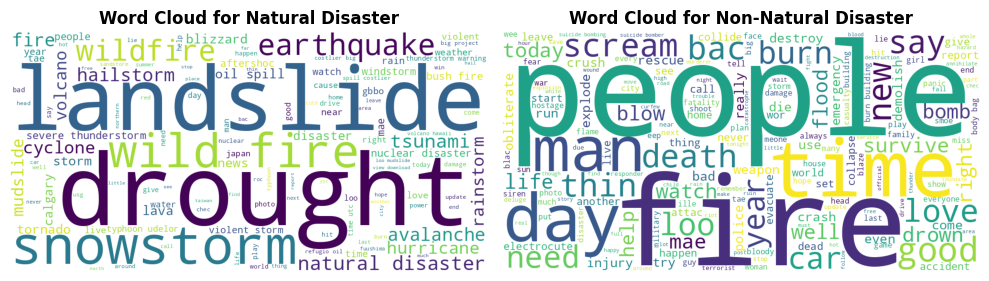

In [49]:
# filter the dataframe to get rows with 'target' as 'natural disaster' and "non-natural disaster"
df_natural_disaster = disasters_df3_copy[disasters_df3_copy['target'] == 'natural disaster']
df_non_natural_disaster = disasters_df3_copy[disasters_df3_copy['target'] == "non-natural disaster"]

# join the text from the filtered rows into a single string
natural_disaster_text = " ".join(text for text in df_natural_disaster['text'])
non_natural_disaster_text = " ".join(text for text in df_non_natural_disaster['text'])

# generate a word cloud for the natural disaster
wordcloud1 = WordCloud(width = 1000, height = 500, background_color='white',
                      min_font_size = 10).generate(natural_disaster_text)

# generate a word cloud for the non-natural disaster
wordcloud2 = WordCloud(width = 1000, height = 500, background_color = "white",
                       min_font_size = 10).generate(non_natural_disaster_text)

# create subplots for the word clouds
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# display word cloud for the natural disaster in the first subplot
axes[0].imshow(wordcloud1)
axes[0].set_title("Word Cloud for Natural Disaster", fontsize = 12, fontweight = 'bold')
axes[0].axis('off')
# display word cloud for the non-natural disaster in the second subplot
axes[1].imshow(wordcloud2)
axes[1].set_title("Word Cloud for Non-Natural Disaster", fontsize = 12, fontweight = 'bold')
axes[1].axis('off')
# adjust the layout
plt.tight_layout()
# display the plot
plt.show()

**Discussions:**

**Word Cloud for Natural Disaster:**
- The prominent words in the natural disaster word cloud are "drought" and "landslide."
- This suggests that these two terms appear frequently in the text data related to natural disasters.
- It indicates that droughts and landslides might be significant topics or events within the natural disaster category.
- Other less prominent words may also be present but are not highlighted in the visualization.

**Word Cloud for Non-Natural Disaster:**
- The word cloud for non-natural disasters shows different prominent words compared to the natural disaster word cloud.
- The notable words include "time," "people", and "fire."
- These terms suggest that the text data related to non-natural disasters frequently mentions aspects such as time, people, days, and fires.
- It implies that non-natural disasters might involve events that are more time-oriented, impact people directly, occur over a certain period, or involve fires.

###### **4.2: Distribution of Top 10 Most Common Words in Disasters Tweets**
---

Calculates and visualizes the top 10 most common words in the natural and non-natural disaster texts using bar plots, providing insights into the frequently occurring words in each category.

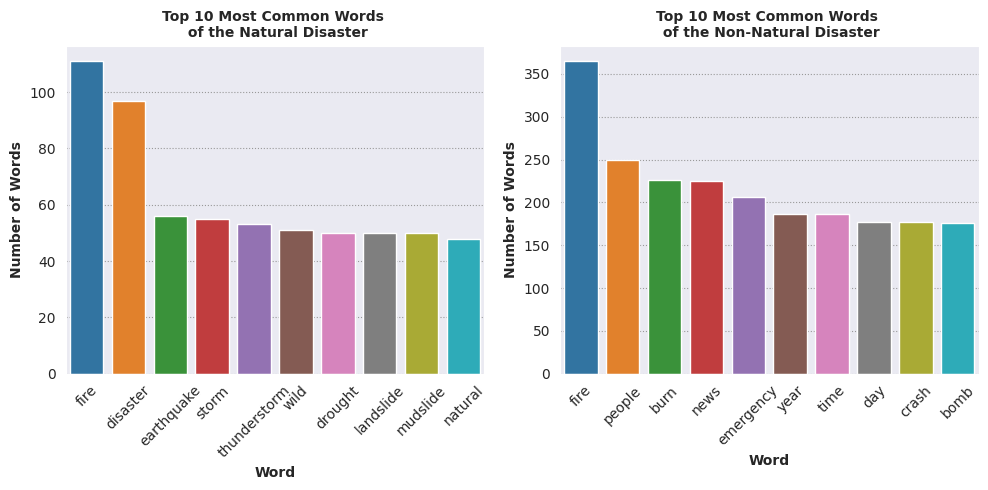

In [50]:
# calculate the top 10 most common words in the respective natural and non-natural disasters
top_10_words_natural_disaster = Counter(natural_disaster_text.split(" ")).most_common(10)
top_10_words_non_natural_disaster = Counter(non_natural_disaster_text.split(" ")).most_common(10)

# create the dataframes for the top 10 words in the natural and non-natural disaster text
top_10_words_natural_disaster_df = pd.DataFrame(top_10_words_natural_disaster, columns = ['word', 'count'])
top_10_words_non_natural_disaster_df = pd.DataFrame(top_10_words_non_natural_disaster, columns = ['word', 'count'])

# set the seaborn style for the plot
sns.set_style("darkgrid", {'grid.color': '.6', 'grid.linestyle': ":"})
# create subplots for the bar plot
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# create a bar plot for the top 10 most common words in the natural disaster text
sns.barplot(x = "word", y = "count", data = top_10_words_natural_disaster_df, ax = axes[0])
# create a bar plot for the top 10 most common words in the non-natural disaster text
sns.barplot(x = "word", y = "count", data = top_10_words_non_natural_disaster_df, ax = axes[1])
# set titles for the subplots
axes[0].set_title("Top 10 Most Common Words \n of the Natural Disaster", fontsize = 10, fontweight = "bold")
axes[1].set_title("Top 10 Most Common Words \n of the Non-Natural Disaster", fontsize = 10, fontweight = "bold")
# set x-labels for the subplots
axes[0].set_xlabel("Word", fontsize = 10, fontweight = "bold")
axes[1].set_xlabel("Word", fontsize = 10, fontweight = "bold")
# set y-labels for the subpltos
axes[0].set_ylabel("Number of Words", fontsize = 10, fontweight = "bold")
axes[1].set_ylabel("Number of Words", fontsize = 10, fontweight = "bold")
# rotate x-axis labels for better visibility
axes[0].set_xticklabels(top_10_words_natural_disaster_df['word'], rotation = 45)
axes[1].set_xticklabels(top_10_words_non_natural_disaster_df['word'], rotation = 45)
# adjust the layout
plt.tight_layout()
# display the plots
plt.show()

**Discussions:**

**For Natural Disaster:**
- The top 10 most common words in the natural disaster category include terms such as "fire," "disaster," "earthquake," "storm," "thunderstorm," "wild," "drought," "landslide," "mudslide," and "natural."
- These words indicate that the text data related to natural disasters frequently mentions events and phenomena such as fires, earthquakes, storms, droughts, and landslides.
- It suggests that these specific natural disaster occurrences are prominent in the dataset.

**For Non-Natural Disaster:**
- The top 10 most common words in the non-natural disaster category consist of words like "fire," "people," "burn," "news," "emergency," "year," "time," "day," "crash," and "bomb."
- These words imply that the text data related to non-natural disasters often references topics such as fires, people, emergencies, news, and events involving crashes or bombs.
- It suggests that non-natural disasters may involve various incidents or situations that impact people, require emergency responses, and receive media attention.

###### **4.3: Number of Words in Disasters Tweets**
---

Calculates and visualizes the distribution of the number of words in the tweets related to natural and non-natural disasters using histogram plots.

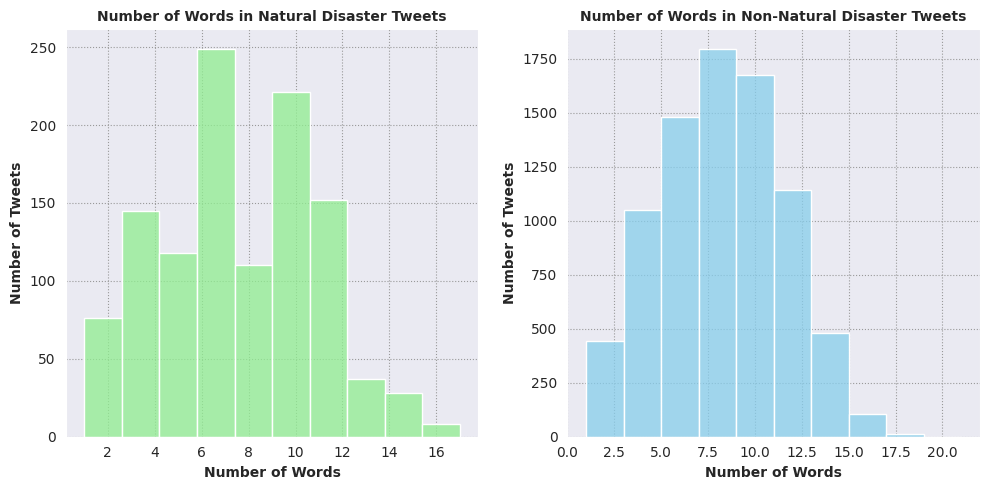

In [51]:
# calculate the number of words in the natural disaster tweets and non-natural disaster tweets
natural_disasters_tweets_len = disasters_df3_copy[disasters_df3_copy['target'] == 'natural disaster']['text'].apply(lambda x: len(x.split(" ")))
len_non_natural_disasters_tweets_len = disasters_df3_copy[disasters_df3_copy['target'] == 'non-natural disaster']['text'].apply(lambda x: len(x.split(" ")))

# set the seaborn style for the plot
sns.set_style('darkgrid', {'grid.color': '.6', 'grid.linestyle': ':'})
# create subplots for the plot
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# create a histogram plot for the number of words in the natural disaster text
sns.histplot(data = natural_disasters_tweets_len, bins = 10, color = 'lightgreen', ax = axes[0])
# create a histogram plot for the number of words in the non-natural disaster text
sns.histplot(data = len_non_natural_disasters_tweets_len, bins = 10, color = 'skyblue', ax = axes[1])
# set titles for the subplots
axes[0].set_title("Number of Words in Natural Disaster Tweets", fontsize = 10, fontweight = "bold")
axes[1].set_title("Number of Words in Non-Natural Disaster Tweets", fontsize = 10, fontweight = "bold")
# set xlabels for the subplots
axes[0].set_xlabel("Number of Words", fontsize = 10, fontweight = "bold")
axes[1].set_xlabel("Number of Words", fontsize = 10, fontweight = "bold")
# set ylabels for the subplots
axes[0].set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
axes[1].set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
# adjust the layout
plt.tight_layout()
# display the plots
plt.show()

**Discussions:**

**Natural Disaster:**

- The histogram plot for natural disaster tweets shows that the number of words in these tweets ranges from 1 to 16.
- The distribution of the number of words appears to be skewed, as it is not normally distributed.
- This suggests that the length of the natural disaster tweets varies significantly, with some tweets being very short (1 word) and others being longer (up to 16 words).
- The majority of the tweets seem to have a relatively low number of words.

**Non-Natural Disaster:**

- The histogram plot for non-natural disaster tweets reveals that the number of words in these tweets ranges from 1 to 19.
- Unlike the natural disaster tweets, the distribution of the number of words appears to be closer to a normal distribution.
- This indicates that the length of non-natural disaster tweets follows a more balanced distribution, with a higher concentration of tweets having an average number of words.
- The majority of the tweets seem to have a moderate number of words.


###### **4.4: Number of Characters in Disasters Tweets**
---

Calculates and visualizes the distribution of the number of characters in the tweets related to natural and non-natural disasters using histogram plots to understand the variations in character counts within each category.

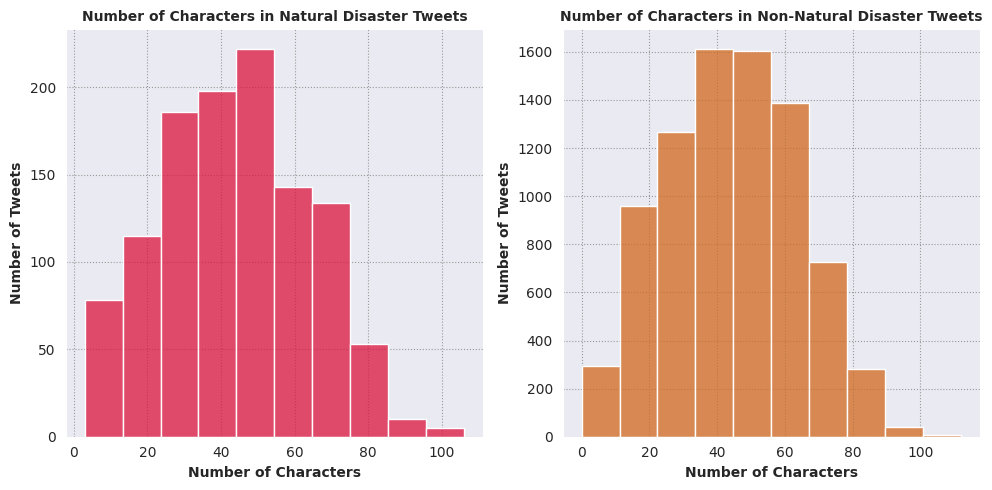

In [52]:
# filter the dataframe to get the rows with "target" as "natural disaster" and "non-natural disaster"
natural_disasters_tweets = disasters_df3_copy[disasters_df3_copy['target'] == 'natural disaster']
non_natural_disasters_tweets = disasters_df3_copy[disasters_df3_copy['target'] == 'non-natural disaster']

# remove white spaces from the text in the natural disaster and non-natural disaster texts
natural_disasters_tweets2 = natural_disasters_tweets['text'].str.replace(' ', '')
non_natural_disasters_tweets2 = non_natural_disasters_tweets['text'].str.replace(' ', '')

# calculate the number of characters in the natural disaster and non-natural disaster texts
natural_disasters_tweets_len_char = natural_disasters_tweets2.apply(lambda x: len(x))
non_natural_disasters_tweets_len_char = non_natural_disasters_tweets2.apply(lambda x: len(x))

# set the seaborn style for the plot
sns.set_style("darkgrid", {'grid.color': '.6', 'grid.linestyle': ':'})
# create subpltos for the plot
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# create a histogram plot for the number of characters in the natural disaster text
sns.histplot(data = natural_disasters_tweets_len_char, bins = 10, ax = axes[0], color = "crimson")
# create a histogram plot for the number of characters in the non-natural disaster text
sns.histplot(data = non_natural_disasters_tweets_len_char, bins = 10, ax = axes[1], color = "chocolate")
# set titles for the subplots
axes[0].set_title("Number of Characters in Natural Disaster Tweets", fontweight = 'bold', fontsize = 10)
axes[1].set_title("Number of Characters in Non-Natural Disaster Tweets", fontweight = 'bold', fontsize = 10)
# set xlabels for the subplots
axes[0].set_xlabel("Number of Characters", fontsize = 10, fontweight = 'bold')
axes[1].set_xlabel("Number of Characters", fontsize = 10, fontweight = 'bold')
# set ylabels for the subplots
axes[0].set_ylabel("Number of Tweets", fontsize = 10, fontweight = 'bold')
axes[1].set_ylabel("Number of Tweets", fontsize = 10, fontweight = 'bold')
# adjust the layout
plt.tight_layout()
# display the plots
plt.show()

**Discussions:**

**Natural Disaster:**

- The histogram plot for natural disaster tweets shows that the number of characters in these tweets ranges from 0 to 100.
- The distribution of the number of characters appears to be skewed and not normally distributed.
- This suggests that the length of natural disaster tweets varies significantly, with some tweets being very short (0 characters) and others being longer (up to 100 characters).
- The majority of the tweets seem to have a relatively low number of characters.

**Non-Natural Disaster:**

- The histogram plot for non-natural disaster tweets reveals that the number of characters in these tweets ranges from 0 to 110.
- Unlike the natural disaster tweets, the distribution of the number of characters appears to be closer to a normal distribution.
- This indicates that the length of non-natural disaster tweets follows a more balanced distribution, with a higher concentration of tweets having an average number of characters.
- The majority of the tweets seem to have a moderate number of characters.

###### **4.5: Distribution of the Disasters Classification**
---

Generates a countplot to provide a visual representation of the distribution of disasters classification to provide insights into the overall distribution of the dataset based on disaster classification.

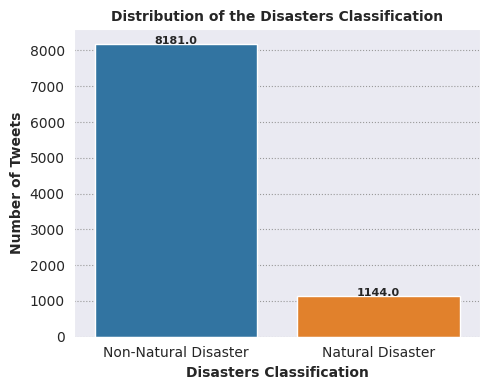

In [53]:
# set the seaborn style for the plot
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# create a figure with specified size
plt.figure(figsize = (5, 4))
# create a countplot for the target column in the datraframe
ax = sns.countplot(x = disasters_df3_copy['target'])
# add texts to the bar on the countplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height() + 0.5,rect.get_height(),horizontalalignment='center', fontsize = 8, fontweight = "bold")
# set x-axis tick labels
ax.set_xticklabels(['Non-Natural Disaster', 'Natural Disaster'], fontsize = 10)
# set x-axis label
ax.set_xlabel("Disasters Classification", fontweight = "bold", fontsize = 10)
# set y-axis label
ax.set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
# set the title of the plot
plt.title("Distribution of the Disasters Classification", fontsize = 10, fontweight = "bold")
# adjust the layout
plt.tight_layout()
# display the plot
plt.show()

**Discussions:**
- The countplot reveals a significant class imbalance between the "Natural Disaster" and "Non-Natural Disaster" categories.
- The "Natural Disaster" category has a count of 1144 tweets, while the "Non-Natural Disaster" category has a count of 8181 tweets.
- This indicates that the dataset is heavily imbalanced towards the "Non-Natural Disaster" category, which has a much larger number of tweets compared to the "Natural Disaster" category.

###### **4.6: Sentiment Analysis using VADER on Disaster Tweets**
---

The objective of performing Sentiment Analysis using VADER (Valence Aware Dictionary and sEntiment Reasoner) on Disaster Tweets text classification is to determine the sentiment or emotional polarity expressed in the tweets related to disasters. By applying VADER, which is a rule-based sentiment analysis tool specifically designed for social media text, we can automatically analyze the sentiment of each tweet and classify it as positive, negative, or neutral.

In [54]:
# define a function to classify the sentiment based on polarity score
def classify_sentiment(score):
  if score > 0:
    sentiment_class = "positive"
  elif score < 0:
    sentiment_class = "negative"
  else:
    sentiment_class = "neutral"
  return sentiment_class

# create a sentiment-intensity-analyzer object
sia = SentimentIntensityAnalyzer()
# calculate the sentiment score for each row of the text and store it in a new column called "sentiment score"
disasters_df3_copy['sentiment score'] = disasters_df3_copy['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
# call the function to classify the sentiment based on the polarity scores and store the result in a new column called "sentiment class"
disasters_df3_copy['sentiment class'] = disasters_df3_copy['sentiment score'].apply(lambda x: classify_sentiment(x))
# dsiplay a sample of 10 rows from the dataframe
disasters_df3_copy.sample(10)

,keyword,text,target,sentiment score,sentiment class
10461,wild fires,man give can right help wild fire,natural disaster,0.0772,positive
6761,lightning,baby lightning bottle,non-natural disaster,0.0000,neutral
1748,buildings burning,port coquitlam fire burn several business,non-natural disaster,-0.3400,negative
8908,snowstorm,bring bac game past snowstorm tic tac toe batt...,natural disaster,-0.0258,negative
6816,loud bang,matao bot break news unconfirmed hear loud ban...,non-natural disaster,-0.1280,negative
9203,suicide bombing,dead uwait mosque suicide bombing claim isis o...,non-natural disaster,-0.8689,negative
10282,war zone,resistance wage guerrilla warfare force red zo...,non-natural disaster,-0.7269,negative
10655,wounds,help love suffer self esteem wound today,non-natural disaster,0.5267,positive
4412,electrocute,oay electrocute badly right,non-natural disaster,-0.4767,negative
1659,bombing,sanitise narrative hiroshima atomic bombing hi...,non-natural disaster,0.0000,neutral




> **Distribution of Positive, Neutral, and Negative Sentiments in Disasters Tweets**
---



Shows the barplot of the sentiment categories (such as positive, negative, and neutral) in natural and non-natural disaster tweets to provide insights into the emotional tone of the tweets related to different types of disasters.

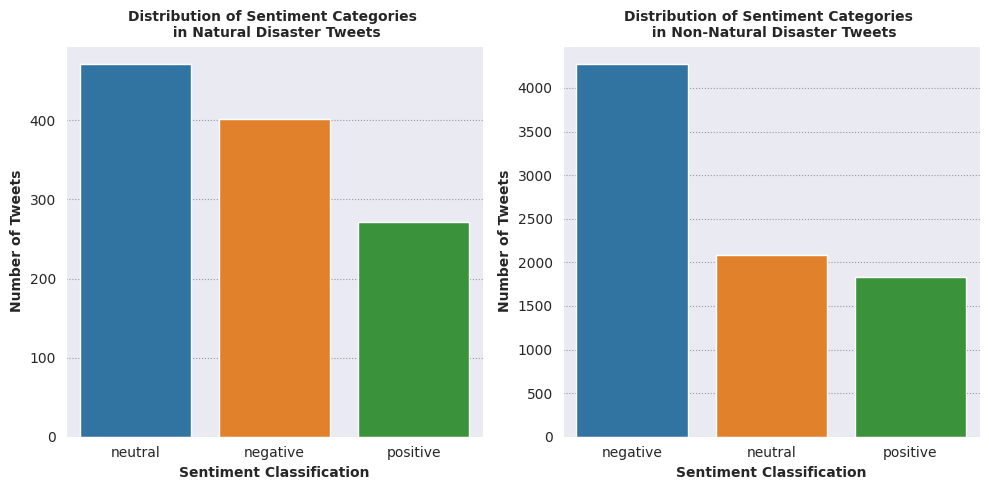

In [55]:
# filter the dataframe to get the rows with "target" as "natural disaster" and "non-natural disaster"
natural_disasters_sentiment_class = disasters_df3_copy[disasters_df3_copy['target'] == "natural disaster"]
non_natural_disasters_sentiment_class = disasters_df3_copy[disasters_df3_copy['target'] == "non-natural disaster"]
# set the seaborn style for the plot
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# create a figure with the subplots
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# create a countplot for the sentiment classification in the natural disaster text
sns.countplot(x = "sentiment class",
              data = natural_disasters_sentiment_class,
              ax = axes[0],
              order = natural_disasters_sentiment_class['sentiment class'].value_counts().index)
# create a countplot for the sentiment classification in the non-natural disaster text
sns.countplot(x = "sentiment class",
              data = non_natural_disasters_sentiment_class,
              ax = axes[1],
              order = non_natural_disasters_sentiment_class['sentiment class'].value_counts().index)
# set the title and labels for the subplots
axes[0].set_title("Distribution of Sentiment Categories \n in Natural Disaster Tweets", fontsize = 10, fontweight = "bold")
axes[1].set_title("Distribution of Sentiment Categories \n in Non-Natural Disaster Tweets", fontsize = 10, fontweight = "bold")
axes[0].set_xlabel("Sentiment Classification", fontsize = 10, fontweight = "bold")
axes[1].set_xlabel("Sentiment Classification", fontsize = 10, fontweight = "bold")
axes[0].set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
axes[1].set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
# adjust the layout
plt.tight_layout()
# display the ploys
plt.show()

**Discussions:**

**Natural Disaster Sentiment Analysis:**

- Neutral Sentiment: The bar representing the neutral sentiment category is the highest, indicating that a significant portion of the natural disaster tweets has a neutral sentiment. This suggests that the tweets related to natural disasters are more informative or factual in nature, rather than expressing a strong positive or negative sentiment.
- Negative Sentiment: The bar representing the negative sentiment category is lower than the neutral sentiment category but still higher than the positive sentiment category. This implies that some natural disaster tweets express a negative sentiment, possibly indicating concerns, fear, or negative experiences related to the disasters.
- Positive Sentiment: The bar representing the positive sentiment category is the lowest, indicating that only a small portion of the natural disaster tweets exhibit a positive sentiment. This suggests that positive emotions or experiences are less common in tweets related to natural disasters.

**Non-Natural Disaster Sentiment Analysis:**

- Negative Sentiment: The bar representing the negative sentiment category is the highest, indicating that a significant portion of the non-natural disaster tweets expresses a negative sentiment. This suggests that tweets related to non-natural disasters, such as accidents or emergencies, often convey negative emotions, concerns, or complaints.
- Neutral Sentiment: The bar representing the neutral sentiment category is lower than the negative sentiment category but higher than the positive sentiment category. This indicates that some non-natural disaster tweets are more informative or factual, without strongly expressing positive or negative emotions.
- Positive Sentiment: The bar representing the positive sentiment category is the lowest, suggesting that only a small portion of the non-natural disaster tweets exhibit a positive sentiment. This implies that positive emotions or experiences are relatively uncommon in tweets related to non-natural disasters.



> **WordCloud of Positive, Neutral, and Negative Sentiments in Disasters Tweets**
---


Using word clouds to provide an intuitive representation of the prominent words and themes associated with each sentiment category, allowing for a quick understanding of the overall sentiment conveyed in the tweets.

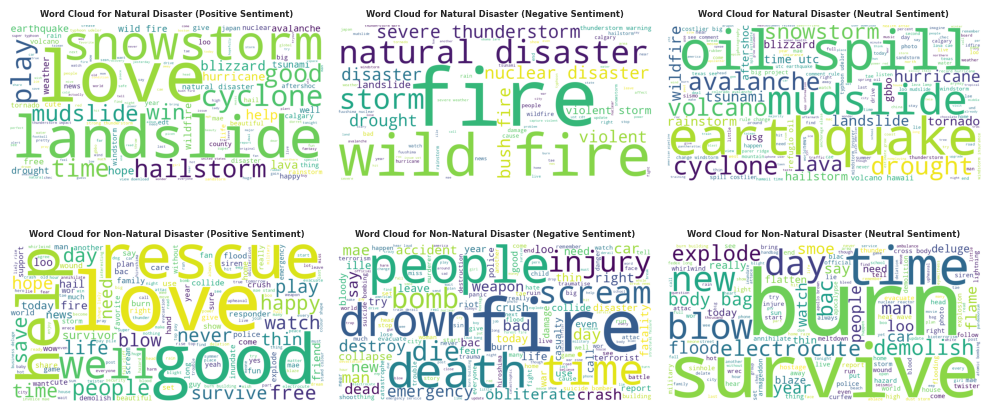

In [56]:
# filter the dataframe for natural disasters and sentiment classes
natural_disasters_sentiment_class = disasters_df3_copy[disasters_df3_copy['target'] == "natural disaster"]
natural_disasters_sentiment_class_pos = natural_disasters_sentiment_class[natural_disasters_sentiment_class['sentiment class'] == "positive"]
natural_disasters_sentiment_class_neg = natural_disasters_sentiment_class[natural_disasters_sentiment_class['sentiment class'] == "negative"]
natural_disasters_sentiment_class_neut = natural_disasters_sentiment_class[natural_disasters_sentiment_class['sentiment class'] == "neutral"]

# filter the dataframe for non-natural disasters and sentiment classes
non_natural_disasters_sentiment_class = disasters_df3_copy[disasters_df3_copy['target'] == "non-natural disaster"]
non_natural_disasters_sentiment_class_pos = non_natural_disasters_sentiment_class[non_natural_disasters_sentiment_class['sentiment class'] == "positive"]
non_natural_disasters_sentiment_class_neg = non_natural_disasters_sentiment_class[non_natural_disasters_sentiment_class['sentiment class'] == "negative"]
non_natural_disasters_sentiment_class_neut = non_natural_disasters_sentiment_class[non_natural_disasters_sentiment_class['sentiment class'] == "neutral"]

# create concatenated texts for the word clouds
natural_disaster_text_pos = " ".join(text for text in natural_disasters_sentiment_class_pos['text'])
natural_disaster_text_neg = " ".join(text for text in natural_disasters_sentiment_class_neg['text'])
natural_disaster_text_neut = " ".join(text for text in natural_disasters_sentiment_class_neut['text'])
non_natural_disaster_text_pos = " ".join(text for text in non_natural_disasters_sentiment_class_pos['text'])
non_natural_disaster_text_neg = " ".join(text for text in non_natural_disasters_sentiment_class_neg['text'])
non_natural_disaster_text_neut = " ".join(text for text in non_natural_disasters_sentiment_class_neut['text'])

# generate word clouds
wordcloud1 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(natural_disaster_text_pos)
wordcloud2 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(natural_disaster_text_neg)
wordcloud3 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(natural_disaster_text_neut)
wordcloud4 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(non_natural_disaster_text_pos)
wordcloud5 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(non_natural_disaster_text_neg)
wordcloud6 = WordCloud(width = 1000, height = 500, background_color='white', min_font_size = 10).generate(non_natural_disaster_text_neut)

# create subplots for word clouds
fig, axes = plt.subplots(2, 3, figsize = (10, 5))
axes[0][0].imshow(wordcloud1)
axes[0][0].set_title("Word Cloud for Natural Disaster (Positive Sentiment)", fontsize = 6, fontweight = "bold")
axes[0][0].axis('off')

axes[0][1].imshow(wordcloud2)
axes[0][1].set_title("Word Cloud for Natural Disaster (Negative Sentiment)", fontsize = 6, fontweight = "bold")
axes[0][1].axis('off')

axes[0][2].imshow(wordcloud3)
axes[0][2].set_title("Word Cloud for Natural Disaster (Neutral Sentiment)", fontsize = 6, fontweight = "bold")
axes[0][2].axis('off')

axes[1][0].imshow(wordcloud4)
axes[1][0].set_title("Word Cloud for Non-Natural Disaster (Positive Sentiment)", fontsize = 6, fontweight = "bold")
axes[1][0].axis('off')

axes[1][1].imshow(wordcloud5)
axes[1][1].set_title("Word Cloud for Non-Natural Disaster (Negative Sentiment)", fontsize = 6, fontweight = "bold")
axes[1][1].axis('off')

axes[1][2].imshow(wordcloud6)
axes[1][2].set_title("Word Cloud for Non-Natural Disaster (Neutral Sentiment)", fontsize = 6, fontweight = "bold")
axes[1][2].axis('off')
# adjust the layout
plt.tight_layout()
# display the plots
plt.show()

## **5. Further Text Preprocessing**
---

##### **5.1: Data Partitioning (80% Training and 20% Testing Sets)**
---

Performs a train-test split on the 'text' and 'label' data, creating separate training and testing sets for further analysis, model training, or evaluation. Splitting the dataset into a training set and a test set allows us to evaluate the performance of the model on unseen data. The training set is used to train the model, while the test set is used to assess its performance.

In [57]:
# split the text and label data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(disasters_df3_copy['text'],
                                                    disasters_df3_copy['target'],
                                                    test_size = 0.20, # 20% used for testing while 80% used for training
                                                    random_state = 42, # to ensure reproducibility
                                                    stratify = disasters_df3_copy['target']) # to ensure that the class distribution in the original 'label' data is maintained in both the training and testing sets.
                                                    # this is helpful when dealing with imbalanced datasets to ensure that both sets represent the same proportion of different classes.

In [58]:
# save the cleaned train dataset into the google drive
fpath1 = "/content/drive/My Drive/SDVLA/nlp/capstone_project/cleaned_trained_text.csv"
X_train.to_csv(fpath1, index = False)

##### **5.2: TF-IDF Vectorization**
---

##### **Background of the TF-IDF Vectorization technique:**

The objective of **TF-IDF (Term Frequency-Inverse Document Frequency) vectorization** in natural language processing (NLP) is to represent text documents numerically in a way that captures their importance and relevance within a corpus.

**TF-IDF** takes into account two important factors:

**Term Frequency (TF):** This measures the frequency of a term (word) within a document. The intuition is that the more times a term appears in a document, the more important it might be for that document.

**Inverse Document Frequency (IDF):** This measures the rarity of a term across the entire corpus. The intuition is that terms that appear frequently across all documents might not contain as much discriminatory information as those that appear less frequently.

By combining these two factors, TF-IDF assigns weights to each term in a document, reflecting its importance in the document relative to the entire corpus. The higher the TF-IDF weight, the more relevant the term is to the document.

The **objective** of TF-IDF vectorization is **to convert a document into a numerical vector representation**, where each element of the vector corresponds to the TF-IDF weight of a particular term in the document. This allows **NLP algorithms to work with numerical inputs and enables various tasks such as document clustering, information retrieval, text classification, and more.**

**Why uses TFIDF for text representation instead of other embeddings methods such as Word2Vec, GloVe, and Sentence Transformer?**

- During the experiments, it was found that TF-IDF worked better for the natural disaster category compared to Word2Vec, GloVe, and Sentence Transformers.
- TF-IDF made use of all the available words in the training set.
- As such, TF-IDF gained more information from the training set as compared to the embedding methods.


In [59]:
# create an instance of TfidfVectorizer with specified parameters
# - stop_words: Remove common English words
# - ngram_range: Generate n-grams of size 1 to 3
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 3))
# fit the TfidfVectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# transform the test data using the fitted TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### **5.3: SMOTE-Tomek Resampling**
---

##### **Background of the SMOTE-Tomek technique:**

**SMOTE-Tomek** is a combination of two resampling techniques: **SMOTE (Synthetic Minority Over-sampling Technique) and Tomek Links.**

Here's how SMOTE-Tomek works:

**1) SMOTE:** **SMOTE** is applied first to oversample the minority class. It works by creating synthetic samples in the feature space of the minority class. It selects a minority class example and finds its k nearest neighbors. It then synthesizes new examples by interpolating between the selected example and its neighbors. This process helps to increase the number of minority class examples, making it more balanced with the majority class.

**2) Tomek Links:** After applying SMOTE, Tomek Links is used to remove noisy and borderline examples. Tomek Links identify pairs of examples from different classes that are close to each other in the feature space but are of different classes. These pairs are known as Tomek Links. Removing the examples from the majority class in Tomek Links helps in improving the separability between the two classes, making the decision boundary more distinct.

By combining **SMOTE** and **Tomek Links**, SMOTE-Tomek aims to alleviate the class imbalance problem while also removing potentially noisy or ambiguous examples. This can lead to better generalization and improved performance of machine learning models, especially in scenarios where imbalanced datasets are prevalent.


###### **5.3a: Visualize the class distribution on the training data (before applying SMOTE-Tomek)**

Generates a countplot to provide a visual representation of the distribution of disasters classification to provide insights into the overall distribution of the dataset based on disaster classification.

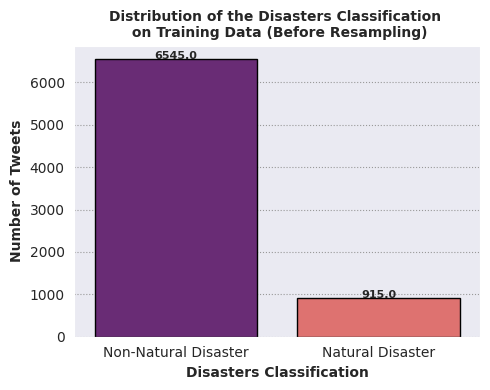

In [60]:
# set the seaborn style for the plot
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# create a figure with specified size
plt.figure(figsize = (5, 4))
# create a countplot for the target column in the datraframe
ax = sns.countplot(x = pd.Series(y_train), palette = "magma", linewidth = 1, edgecolor = "black")
# add texts to the bar on the countplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height() + 0.5,rect.get_height(),horizontalalignment='center', fontsize = 8, fontweight = "bold")
# set x-axis tick labels
ax.set_xticklabels(['Non-Natural Disaster', 'Natural Disaster'], fontsize = 10)
# set x-axis label
ax.set_xlabel("Disasters Classification", fontweight = "bold", fontsize = 10)
# set y-axis label
ax.set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
# set the title of the plot
plt.title("Distribution of the Disasters Classification \n on Training Data (Before Resampling)", fontsize = 10, fontweight = "bold")
# adjust the layout
plt.tight_layout()
# display the plot
plt.show()

**Discussions:**

The class distribution of the disaster tweets based on the training data shows a significant class imbalance. The number of tweets labeled as natural disaster is 915, while the number of tweets labeled as non-natural disaster is 6,545. This means that the non-natural disaster class is heavily overrepresented compared to the natural disaster class.

Class imbalances can pose challenges in machine learning tasks as algorithms tend to favor the majority class and may struggle to properly learn and classify instances from the minority class. In this case, the algorithm might have a higher tendency to predict tweets as non-natural disaster, resulting in lower accuracy and performance for identifying natural disaster-related tweets.

Addressing class imbalance is crucial to ensure fair and accurate classification. Resampling techniques can be employed to mitigate the impact of class imbalance by either oversampling the minority class or undersampling the majority class. Oversampling involves replicating instances from the minority class to balance the class distribution, while undersampling involves reducing the number of instances from the majority class.

###### **5.3b: Apply Resampling Technique using SMOTE-Tomek on the training data (Estimated Time: ~2 mins)**

Balance the class distribution in the training data by using **SMOTETomek function** to generate the synthetic samples for the minority class and removing instances that may cause misclassification. This helps to mitigate the impact of class imbalance and improve the performance of the machine learning model trained on this data.

In [61]:
# create an instance of SMOTETomek with a random state for reproducibility
smt = SMOTETomek(random_state = 42)
# apply SMOTETomek to perform oversampling and undersampling
X_train_res, y_train_res = smt.fit_resample(X_train_tfidf, y_train)

###### **5.3c: Visualize the class distribution on the training data (after applying SMOTE-TOmek)**

Generates a countplot to provide a visual representation of the distribution of disasters classification to provide insights into the overall distribution of the dataset based on disaster classification.

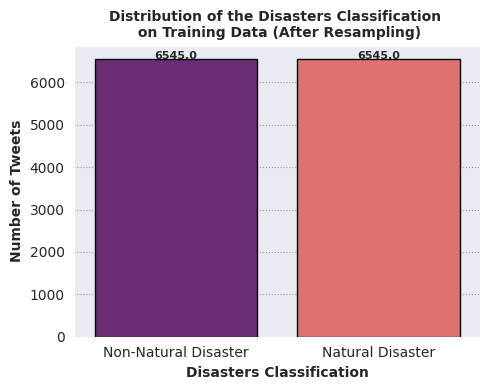

In [62]:
# set the seaborn style for the plot
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# create a figure with specified size
plt.figure(figsize = (5, 4))
# create a countplot for the target column in the datraframe
ax = sns.countplot(x = pd.Series(y_train_res), palette = "magma", linewidth = 1, edgecolor = "black")
# add texts to the bar on the countplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height() + 0.5,rect.get_height(),horizontalalignment='center', fontsize = 8, fontweight = "bold")
# set x-axis tick labels
ax.set_xticklabels(['Non-Natural Disaster', 'Natural Disaster'], fontsize = 10)
# set x-axis label
ax.set_xlabel("Disasters Classification", fontweight = "bold", fontsize = 10)
# set y-axis label
ax.set_ylabel("Number of Tweets", fontsize = 10, fontweight = "bold")
# set the title of the plot
plt.title("Distribution of the Disasters Classification \n on Training Data (After Resampling)", fontsize = 10, fontweight = "bold")
# adjust the layout
plt.tight_layout()
# display the plot
plt.show()

**Discussions:**

After applying a resampling technique to the training data for disaster tweets, the balance class distribution is achieved with 6545 instances labeled as natural disaster and 6545 instances labeled as non-natural disaster. By equalizing the number of instances in each class through resampling, the resulting dataset provides a balanced representation of both classes, allowing for more accurate and unbiased model training.

## **6. Spot Check Classical Machine Learning Algorithms**
---

Spot checking classical machine learning algorithms before integrating them into a voting classifier serves several important objectives:

**1. Baseline Comparison:** Spot checking provides a baseline for performance comparison. By evaluating individual algorithms separately, we could establish a benchmark for the performance of the voting classifier. The voting classifier should ideally outperform the individual algorithms, so spot checking them ensuring that it adds value to the model.

**2. Algorithm Selection:** Not all algorithms are equally suitable for all types of data and tasks. Spot checking helps to choose the most appropriate algorithms for particular dataset.

**3. Undersanding Algorithm Behavior:** By spot checking, we could gain insights into how different algorithms behave on the given dataset. This can help us understand the underlying patterns and relationships that the algorithms are learning and how they handle specific challenges in the dataset.

##### **6.1: Create function for various evaluation metrics**
---

To assess the performance and effectiveness of a trained machine learning or deep learning model on a specific task or problem. It involves quantitatively and qualitatively analyzing the model's predictions and comparing them to ground truth or expected outcomes.

###### **6.1a: What is a classification report?**
---

**Background of the classification report:**

A **classification report** is a performance evaluation metric that provides a comprehensive summary of the performance of a classification model. It is particularly useful for evaluating the predictive accuracy of a model when working with classification tasks.

A classification report typically includes several key metrics such as precision, recall, F1-score, and support, which provide insights into the model's performance for each class in the dataset.

The following are the main components of a classification report:

**Precision:** Precision measures the ability of a model to correctly identify positive instances out of all instances predicted as positive. It is calculated as the ratio of true positive (TP) predictions to the sum of true positive and false positive (FP) predictions. A higher precision indicates fewer false positives.

**Recall:** Recall, also known as sensitivity or true positive rate, measures the ability of a model to correctly identify positive instances out of all actual positive instances. It is calculated as the ratio of true positive (TP) predictions to the sum of true positive and false negative (FN) predictions. A higher recall indicates fewer false negatives.

**F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. **The F1-score is useful when there is an imbalance between classes or when both precision and recall are important.**

**Support:** Support represents the number of occurrences of each class in the dataset. It provides an understanding of the distribution of classes and can help identify imbalanced datasets.

The classification report displays these metrics for each class in the dataset, allowing you to assess the model's performance on a per-class basis. It provides a more detailed evaluation than simple accuracy, especially when dealing with imbalanced datasets where accuracy alone can be misleading.









**Create a function to display the classification report for the machine learning model.**

In [63]:
# define function to display classification report
def model_classification_report(y_true, y_predict, title):
  print("Classification Report for " + title)
  return classification_report(y_true, y_predict)

###### **6.1b: What is a confusion matrix?**
---

A confusion matrix is typically a square matrix with rows and columns representing the classes in the dataset. The predicted classes are shown in the columns, while the actual classes are shown in the rows. Each cell in the matrix represents the count or frequency of instances that belong to a specific combination of predicted and actual classes.

The confusion matrix consists of four main components:

**True Positives (TP):** It represents the number of instances that are correctly predicted as positive (belonging to the positive class).

**True Negatives (TN):** It represents the number of instances that are correctly predicted as negative (belonging to the negative class).

**False Positives (FP):** It represents the number of instances that are incorrectly predicted as positive (predicted as belonging to the positive class but actually belonging to the negative class). Also known as a Type I error.

**False Negatives (FN):** It represents the number of instances that are incorrectly predicted as negative (predicted as belonging to the negative class but actually belonging to the positive class). Also known as a Type II error.



**Create a function to display the confusion matrix for the machine learning model.**

In [64]:
# define function to display confusion matrix
def display_conf_matrix(y_true, y_predict, title):
  # calculate the confusion matrix based on the true Y value and the repdicted Y value on data
  model_conf_matrix = confusion_matrix(y_true, y_predict)

  # set confusion matrix labels
  con_matrix_labels= ['True Negative', 'False Positive', 'False Negative', 'True Positive']
  # set confusion matrix count
  conf_matrix_counts = ["{0:0.0f}".format(val) for val in model_conf_matrix.flatten()]
  # set confusion matrix labels
  confMatrixlabels = np.array([f"{v1}\n{v2}" for v1, v2 in zip(con_matrix_labels, conf_matrix_counts)]).reshape(2,2)

  # set figure size
  plt.figure(figsize = (4, 3))
  ax = plt.subplot()
  # create a heatmap with confusion matrix
  sns.heatmap(model_conf_matrix, annot = confMatrixlabels, fmt = '', cmap = 'icefire_r')
  # set title
  ax.set_title("Confusion Matrix for " + title, fontweight = 'bold', fontsize = 7)
  # set axis labels
  ax.set_xlabel("Predicted Label", fontweight = 'bold', fontsize = 6)
  ax.set_ylabel("Actual Label", fontweight = 'bold', fontsize = 6)
  # set axis ticklabels
  ax.xaxis.set_ticklabels(['Natural Disaster', 'Non-Natural Disaster'], fontsize = 6)
  ax.yaxis.set_ticklabels(['Natural Disaster', 'Non-Natural Disaster'], fontsize = 6)
  # show the confusion matrix using heatmap
  plt.show()

###### **6.1c: What is a precision-recall curve?**
---

The **precision-recall curve** is a graphical representation that illustrates the trade-off between precision and recall for different classification thresholds. It is commonly used to evaluate the performance of a binary classification model, particularly in scenarios where **class imbalance** exists or when the cost of false positives and false negatives varies. It provides insights into the model's ability to accurately identify positive instances while minimizing false positives or false negatives, considering the specific problem context.

The area under the precision-recall curve (AUC-PR) is a single-value metric used to summarize the overall performance of the model. A higher AUC-PR indicates better discrimination between positive and negative instances, with a higher precision-recall trade-off.

**Create a function to display the precision-recall curve for the machine learning model.**

In [65]:
# define function to plot PR-curve
def display_pr_curve(y_true, y_scores, title):
  # compute precision, recall, and corresponding decision thresholds
  precision, recall, thresholds = precision_recall_curve(y_true, y_scores, pos_label = "non-natural disaster")
  # compute PR AUC
  pr_auc = auc(recall, precision)
  # plot the PR curve
  plt.figure(figsize = (4, 3))
  # create the plot of the PR curve
  plt.plot(recall, precision, label = "PR Curve")
  # shade the area under the PR curve
  plt.fill_between(recall, precision, alpha = 0.3, color = 'lightgreen')
  # set axis labels
  plt.xlabel('Recall', fontweight = 'bold', fontsize = 10)
  plt.ylabel('Precision', fontweight = 'bold', fontsize = 10)
  # set title
  plt.title("Precision-Recall Curve for " + title, fontweight = 'bold', fontsize = 10)
  # set legend
  plt.legend(loc = "lower left", shadow = True, fontsize = 10)
  # display plot
  plt.show()
  # print the precision-recall area under the curve
  print("The PR AUC for {} is {:.4f}".format(title, pr_auc))
  print()


###### **6.1d: What is a ROC-AUC curve?**
---

The **ROC-AUC curve (Receiver Operating Characteristic - Area Under the Curve)** is a graphical representation that illustrates the performance of a binary classification model across various classification thresholds. It is widely used to evaluate the predictive power of a model and its ability to discriminate between positive and negative instances.

The **ROC curve** is created by plotting the **true positive rate (TPR)**, also known as recall or sensitivity, against the **false positive rate (FPR)** for different threshold settings. The TPR represents the proportion of correctly predicted positive instances out of all actual positive instances, while the FPR represents the proportion of incorrectly predicted negative instances out of all actual negative instances.

The area under the **ROC curve (AUC-ROC)** is a widely used metric that summarizes the overall performance of the model. It represents the probability that a randomly chosen positive instance will be ranked higher than a randomly chosen negative instance according to the model's predicted probabilities. **An AUC-ROC value of 1 indicates a perfect classifier, while an AUC-ROC value of 0.5 suggests a random or non-discriminative classifier.**

The **ROC-AUC** curve is particularly useful when evaluating models in scenarios with **imbalanced datasets** or when the costs of false positives and false negatives are not equal. It provides insights into the model's ability to correctly classify instances across different thresholds and allows for comparison of different models based on their discriminative power.

In [66]:
# define function to plot roc-curve
def display_roc_curve(y_true, y_scores, title):
  # Compute false positive, true positive, and corresponding decision thresholds
  fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label = "non-natural disaster")
  # compute ROC AUC
  roc_auc = auc(fpr, tpr)
  # plot the ROC curve
  plt.figure(figsize = (4, 3))
  # create the plot of the roc-auc curve
  plt.plot(fpr, tpr, color = "crimson", label = "ROC Curve")
  # shade the area under the PR curve
  plt.fill_between(fpr, tpr, alpha = 0.3, color = 'lightgreen')
  # create the plot for no skill
  plt.plot([1, 0], [1, 0], color = "navy", linestyle = "--", label = "No Skill")
  # set axis labels
  plt.xlabel('False Positive Rate (FPR)', fontweight = 'bold', fontsize = 10)
  plt.ylabel('True Positive Rate (TPR)', fontweight = 'bold', fontsize = 10)
  # set title
  plt.title("ROC Curve for " + title, fontweight = 'bold', fontsize = 10)
  # set legend
  plt.legend(loc = "lower right", shadow = True, fontsize = 10)
  # display the plot
  plt.show()
  # print the ROC-AUC area under the curve
  print("The ROC AUC for {} is {:.4f}".format(title, roc_auc))
  print()

##### **6.2 Model Training, Evaluation, and Selection of Classical Machine Learning Algorithms**
---

###### **6.2a: Logistic Regression**
---

**Logistic regression** is a popular and widely used algorithm for binary classification. It is a supervised learning algorithm that predicts the probability of an instance belonging to a certain class based on input features. Despite its name, logistic regression is primarily used for classification tasks rather than regression tasks.

The logistic regression algorithm in scikit-learn (sklearn) provides an implementation of logistic regression that utilizes the logistic function (also known as the sigmoid function) to model the relationship between the input features and the probability of the target class.

In [67]:
# train and fit the logistic regression model
logreg = LogisticRegression(C = 1, solver = 'sag', random_state = 42) # C = regularization strength
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=1, random_state=42, solver='sag')

**Call the function to evaluate the logistic regression model by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Logistic Regression
                      precision    recall  f1-score   support

    natural disaster       0.89      0.86      0.87       229
non-natural disaster       0.98      0.98      0.98      1636

            accuracy                           0.97      1865
           macro avg       0.93      0.92      0.93      1865
        weighted avg       0.97      0.97      0.97      1865




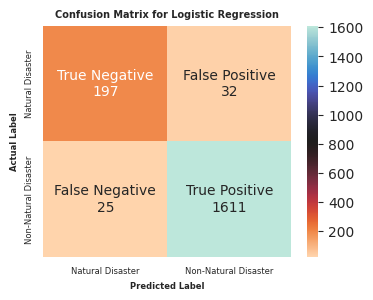

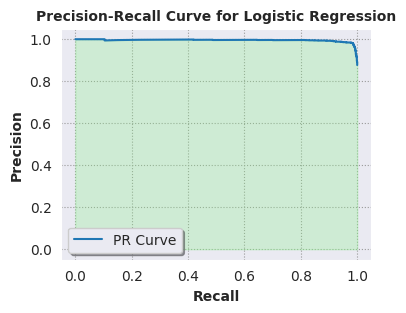

The PR AUC for Logistic Regression is 0.9955



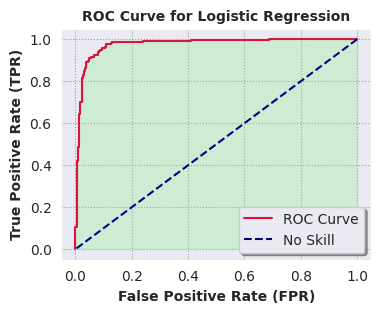

The ROC AUC for Logistic Regression is 0.9763



In [68]:
# predict probabilities on test set
y_scores_logreg = logreg.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_logreg = logreg.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_logreg, 'Logistic Regression'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_logreg, 'Logistic Regression')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_logreg, 'Logistic Regression')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_logreg, 'Logistic Regression')

**Discussions:**

**(A) Classification Report:**

The logistic regression model achieved a high overall performance with an accuracy of 97%. For the "Natural Disaster" class, the precision was 89%, meaning that 89% of the predicted natural disasters were correctly classified. The recall, which measures the proportion of actual natural disasters correctly identified, was 86%. The f1-score, which balances precision and recall, was 87%. The model performed even better for the "Non-Natural Disaster" class, with precision, recall, and f1-score of 98%. The support indicates the number of instances in each class, with 229 instances of natural disasters and 1636 instances of non-natural disasters.


**(B) Confusion Matrix:**

The confusion matrix reveals the model's performance in terms of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). The model correctly identified 1611 instances of natural disasters as true positives, while correctly identifying 197 instances of non-natural disasters as true negatives. There were 32 false positives, meaning instances incorrectly classified as natural disasters, and 25 false negatives, instances of natural disasters mistakenly classified as non-natural disasters.

**(C) Precision-Recall Curve:**

The precision-recall AUC (Area Under the Curve) score indicates the model's overall performance in terms of precision and recall across different thresholds. In this case, the model achieved a high precision-recall AUC of 0.9955, suggesting excellent performance in distinguishing between natural and non-natural disasters.

**(D) ROC Curve:**

The ROC-AUC (Receiver Operating Characteristic-Area Under the Curve) score measures the model's ability to discriminate between positive and negative classes across all possible thresholds. With a ROC-AUC of 0.9763, the model demonstrated a strong performance in classifying natural and non-natural disasters.

**Conclusion:**

The Logistic Regression demonstrated strong performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving high accuracy, precision, recall, f1-scores, and AUC scores.

###### **6.2b: Random Forest Classifier**
---

**Random Forest Classifier** is a popular machine learning algorithm implemented in the scikit-learn library that is used for both classification and regression tasks. It belongs to the ensemble learning family, which combines multiple individual models to create a more robust and accurate model.

Here's a brief explanation of how Gradient Boosting Classifier works:

**1. Building Decision Trees:** A Random Forest consists of a collection of decision trees. Each decision tree is constructed using a random subset of the training data, known as a bootstrap sample. Additionally, at each node of the tree, a random subset of features is selected as candidates for splitting.

**2. Growing Decision Trees:** Each decision tree is grown by recursively splitting the data based on different features and thresholds. The splits are chosen based on criteria such as Gini impurity or entropy to maximize the information gain.

**3. Voting and Predictions:** Once all the decision trees are built, predictions are made by combining the results of each tree. For classification tasks, the mode (most frequent class) among the predictions of all the trees is taken as the final prediction. In the case of regression, the average of the predictions is considered.

**4. Ensemble Learning:** The strength of Random Forest lies in its ensemble learning approach. By aggregating the predictions of multiple decision trees, it reduces overfitting and provides more accurate predictions compared to individual decision trees.

In [69]:
# train and fit the random forest classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=10, random_state=42)

**Call the function to evaluate the random forest classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Random Forest Classifier
                      precision    recall  f1-score   support

    natural disaster       0.89      0.86      0.87       229
non-natural disaster       0.98      0.98      0.98      1636

            accuracy                           0.97      1865
           macro avg       0.93      0.92      0.93      1865
        weighted avg       0.97      0.97      0.97      1865




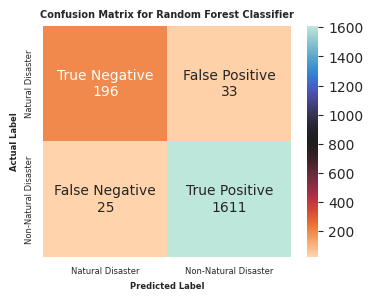

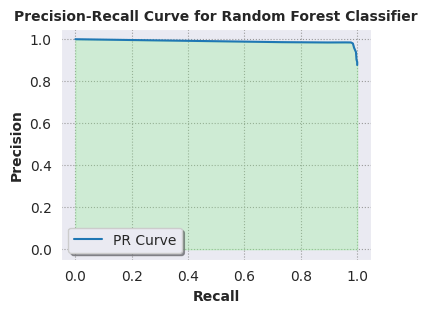

The PR AUC for Random Forest Classifier is 0.9902



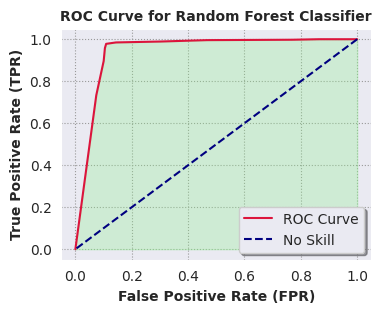

The ROC AUC for Random Forest Classifier is 0.9426



In [70]:
# predict probabilities on test set
y_scores_rfc = rfc.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_rfc = rfc.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_rfc, 'Random Forest Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_rfc, 'Random Forest Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_rfc, 'Random Forest Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_rfc, 'Random Forest Classifier')

**Discussions:**

**(A) Classification Report:**

The Random Forest Classifier performed well in classifying instances of natural disasters and non-natural disasters. The precision for identifying natural disasters was 0.89, indicating that 89% of the instances classified as natural disasters were actually true positives. The recall for natural disasters was 0.86, meaning that the model correctly identified 86% of the actual natural disaster instances. The f1-score, which combines precision and recall, was 0.87, indicating a balanced performance between precision and recall for natural disasters. The precision, recall, and f1-score for non-natural disasters were all high, indicating accurate classification for this class as well. The overall accuracy of the model was 0.97, suggesting a high level of correctness in the classification of both classes. The macro avg and weighted avg f1-scores were both 0.93 and the macro avg and weighted avg precision were both 0.97, indicating a balanced performance across classes with a slight advantage to non-natural disasters due to its higher support.


**(B) Confusion Matrix:**

The confusion matrix reveals the performance of the Random Forest Classifier in terms of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). The model correctly identified 1,611 instances of non-natural disasters (TP) and 196 instances of natural disasters (TN). However, it misclassified 33 instances as non-natural disasters when they were actually natural disasters (FP) and missed 25 instances of non-natural disasters, classifying them as natural disasters (FN).

**(C) Precision-Recall Curve:**

The Precision-Recall Area Under Curve (AUC) value of 0.9902 suggests that the Random Forest Classifier achieved a high precision-recall trade-off. A higher AUC indicates better performance in balancing precision and recall across different probability thresholds.

**(D) ROC Curve:**

The Receiver Operating Characteristic Area Under Curve (ROC-AUC) value of 0.9462 represents the Random Forest Classifier's ability to discriminate between positive and negative classes. The closer the ROC-AUC value is to 1, the better the model's ability to distinguish between the two classes. An ROC-AUC of 0.9462 suggests that the model has reasonably good discriminatory power.

**Conclusion:**

The Random Forest Classifier demonstrated strong performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving high accuracy, precision, recall, f1-scores, and AUC scores.


###### **6.2c: Extra Trees Classifier**
---

**Extra Trees Classifier** is an ensemble learning method based on decision trees. It is similar to the Random Forest algorithm but introduces additional randomness during the tree construction process.

Here's a brief explanation of how Gradient Boosting Classifier works:

**1. Ensemble Method:** The Extra Trees Classifier is an ensemble method that combines multiple decision trees to make predictions. Each decision tree is trained on a different random subset of the training data.

**2. Random Feature Subsets:** Unlike traditional decision trees or Random Forests, the Extra Trees Classifier selects a random subset of features for each split at every node. This randomness helps to reduce overfitting and increase the diversity of the individual trees.

**3. Random Thresholds:** In addition to random feature subsets, the Extra Trees Classifier also chooses random thresholds for each feature in each split. This further enhances the randomness and prevents the decision trees from becoming too similar.

**4. Voting Scheme:** When making predictions, the Extra Trees Classifier combines the predictions of all the individual trees using either a majority voting or weighted voting scheme. The class with the most votes (or highest weight) becomes the final prediction.

In [71]:
# train and fit the extra trees classifier
etc = ExtraTreesClassifier(n_estimators = 10, random_state = 42)
etc.fit(X_train_res, y_train_res)

ExtraTreesClassifier(n_estimators=10, random_state=42)

**Call the function to evaluate the extra trees classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Extra Trees Classifier
                      precision    recall  f1-score   support

    natural disaster       0.88      0.79      0.83       229
non-natural disaster       0.97      0.98      0.98      1636

            accuracy                           0.96      1865
           macro avg       0.92      0.89      0.91      1865
        weighted avg       0.96      0.96      0.96      1865




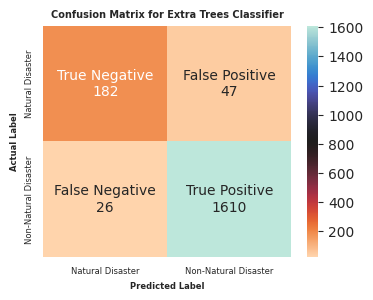

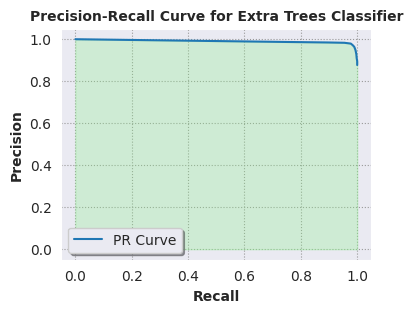

The PR AUC for Extra Trees Classifier is 0.9906



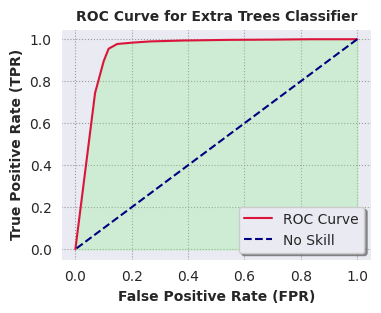

The ROC AUC for Extra Trees Classifier is 0.9441



In [72]:
# predict probabilities on test set
y_scores_etc = etc.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_etc = etc.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_etc, 'Extra Trees Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_etc, 'Extra Trees Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_etc, 'Extra Trees Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_etc, 'Extra Trees Classifier')

**Discussions:**

**(A) Classification Report:**

The Extra Trees Classifier achieved a high overall accuracy of 96% in classifying instances into two categories: Natural Disaster and Non-Natural Disaster. The precision (accuracy of positive predictions) for Natural Disaster was 88%, indicating a relatively high rate of correctly identifying instances of this class. The recall (sensitivity) for Natural Disaster was 79%, suggesting that the model captured a good portion of the positive instances. The f1-score (harmonic mean of precision and recall) for Natural Disaster was 83%, indicating a balanced performance. For the Non-Natural Disaster class, the precision was 97%, indicating a high accuracy in predicting instances correctly. The recall for Non-Natural Disaster was 98%, indicating a high sensitivity to positive instances. The f1-score for Non-Natural Disaster was 98%, indicating excellent performance.


**(B) Confusion Matrix:**

The confusion matrix provides a more detailed breakdown of the model's performance. Out of 1865 instances, the model correctly classified 1610 instances of Non-Natural Disaster (true positives) and 182 instances of Natural Disaster (true negatives). It incorrectly predicted 47 instances as Natural Disaster (false positives) and missed 26 instances of Non-Natural Disaster (false negatives).

**(C) Precision-Recall Curve:**

The Precision-Recall AUC (Area Under the Curve) is a measure of the model's overall performance in terms of precision and recall. The Extra Trees Classifier achieved a Precision-Recall AUC of 0.9906, indicating a high-quality classification model with excellent precision and recall.

**(D) ROC Curve:**

The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a metric that evaluates the model's performance across various classification thresholds. The Extra Trees Classifier achieved an ROC-AUC of 0.9441, which suggests a good ability to distinguish between the two classes.

**Conclusion:**

The Extra Trees Classifier demonstrated strong performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving high accuracy, precision, recall, f1-scores, and AUC scores.


###### **6.2d: Gradient Boosting Classifier**
---

**Gradient Boosting Classifier** is an ensemble method that combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model.

Here's a brief explanation of how Gradient Boosting Classifier works:

**1. Initialization:** The algorithm starts with an initial prediction, which is often the average value for regression or the class with the highest frequency for classification.

**2. Building weak learners:** A weak learner, usually a decision tree, is trained to predict the errors or residuals of the previous model. The weak learner is fit to the data by adjusting its parameters to minimize the error between the predicted and actual values.

**3. Gradient descent:** The algorithm calculates the gradient of the loss function with respect to the predictions of the weak learner. The gradient represents the direction of steepest descent and provides information on how to update the model to minimize the loss.

**4. Combining weak learners:** The weak learner's predictions are multiplied by a small learning rate (shrinkage factor) and added to the overall prediction of the model. This step gradually improves the model by iteratively reducing the errors.

**5. Iterative process:** Steps 2-4 are repeated for a specified number of iterations or until a stopping criterion is met. Each new weak learner is built to correct the mistakes of the previous models, gradually reducing the overall error.

**6. Final prediction:** The final prediction is obtained by combining the predictions of all the weak learners, typically through a weighted sum.

In [73]:
# train and fit the gradient boosting classifier
gbc = GradientBoostingClassifier(n_estimators = 10, random_state = 42)
gbc.fit(X_train_res, y_train_res)

GradientBoostingClassifier(n_estimators=10, random_state=42)

**Call the function to evaluate the gradient boosting classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Gradient Boosting Classifier
                      precision    recall  f1-score   support

    natural disaster       0.86      0.61      0.71       229
non-natural disaster       0.95      0.99      0.97      1636

            accuracy                           0.94      1865
           macro avg       0.91      0.80      0.84      1865
        weighted avg       0.94      0.94      0.94      1865




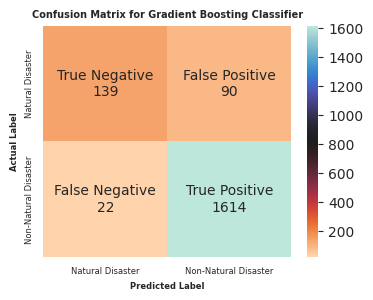

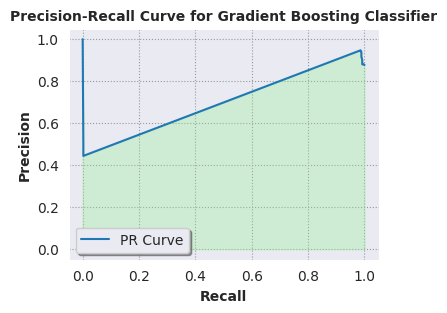

The PR AUC for Gradient Boosting Classifier is 0.6988



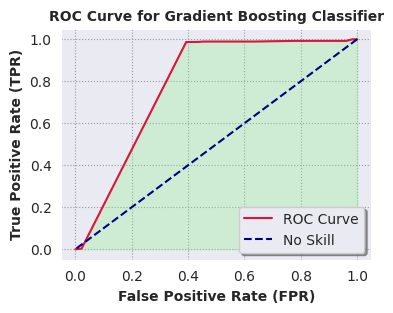

The ROC AUC for Gradient Boosting Classifier is 0.7848



In [74]:
# predict probabilities on test set
y_scores_gbc = gbc.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_gbc = gbc.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_gbc, 'Gradient Boosting Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_gbc, 'Gradient Boosting Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_gbc, 'Gradient Boosting Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_gbc, 'Gradient Boosting Classifier')

**Discussions:**

**(A) Classification Report:**

The Gradient Boosting Classifier achieved an overall accuracy of 94% in classifying natural and non-natural disaster events. For the "Natural Disaster" class, the classifier achieved a precision of 86%, indicating that 86% of the predicted natural disaster events were correctly classified. The recall for this class was 61%, indicating that 61% of the actual natural disaster events were correctly identified by the classifier. The f1-score, which balances precision and recall, was 71% for the "Natural Disaster" class. The "Non-Natural Disaster" class showed excellent performance, with a precision of 95%, recall of 99%, and f1-score of 97%. Overall, the macro-average f1-score was 84%, indicating good performance across both classes. The weighted average f1-score was 94%, demonstrating the classifier's ability to handle imbalanced class distribution.


**(B) Confusion Matrix:**

The confusion matrix shows that the classifier correctly identified 1614 true positive (TP) instances of non-natural disaster events and 139 true negative (TN) instances of natural disaster events. It incorrectly classified 90 instances of natural disaster events as non-natural disaster (false positive, FP) and 22 instances of non-natural disaster events as natural disaster (false negative, FN).

**(C) Precision-Recall Curve:**

The Precision-Recall Area Under Curve (AUC) is 0.6698, indicating a moderate ability of the classifier to balance precision and recall across different probability thresholds. It suggests that the classifier can achieve a reasonable trade-off between correctly identifying positive instances and minimizing false positives.

**(D) ROC Curve:**

The Receiver Operating Characteristic (ROC) Area Under Curve (AUC) is 0.7848, reflecting the classifier's ability to distinguish between the two classes by varying the classification threshold. This value suggests good overall performance in terms of true positive rate and false positive rate, indicating a reasonably accurate classifier for the given problem.

**Conclusion:**

The Gradient Boosting Classifier demonstrated moderately good performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving high accuracy, precision, recall, f1-scores, and AUC scores.


###### **6.2e: Multinomial Naive Bayes Classifier**
---

**Multinomial Naive Bayes** is a probabilistic classification algorithm based on Bayes' theorem, designed specifically for text classification tasks. It assumes that the features (words or terms) in the input data are generated from a multinomial distribution. The working mechanism of Multinomial Naive Bayes can be summarized as follows:

**1. Feature Counting:** In the training phase, the algorithm counts the occurrences of each feature (word) in each class (category) of the labeled training data. It builds a vocabulary of unique features and calculates the total count of features for each class.

**2. Class Prior Probabilities:** The algorithm calculates the prior probabilities of each class based on the relative frequency of each class in the training data.

**3. Conditional Probabilities:** For each feature in the vocabulary, the algorithm computes the conditional probability of its occurrence given a specific class. This involves calculating the relative frequency of the feature in the documents belonging to that class.

**4. Smoothing:** To handle the issue of zero probabilities for features not observed in a particular class, smoothing techniques like Laplace smoothing (additive smoothing) are used, where a small value is added to the feature counts.

**5. Classification:** In the testing phase, the algorithm uses Bayes' theorem to calculate the posterior probability of each class given the features in the input text. It multiplies the prior probability of the class, the conditional probabilities of the features for that class, and normalizes them to obtain the probabilities.

**6. Decision Rule:** The algorithm assigns the class label with the highest posterior probability as the predicted class for the input text.


In [75]:
# train and fit the multinomial NB classifier
mnb = MultinomialNB(alpha = 1)
mnb.fit(X_train_res, y_train_res)

MultinomialNB(alpha=1)

**Call the function to evaluate the multinomial naive bayes classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Multinomial Naive Bayes Classifier
                      precision    recall  f1-score   support

    natural disaster       0.65      0.88      0.75       229
non-natural disaster       0.98      0.93      0.96      1636

            accuracy                           0.93      1865
           macro avg       0.82      0.91      0.85      1865
        weighted avg       0.94      0.93      0.93      1865




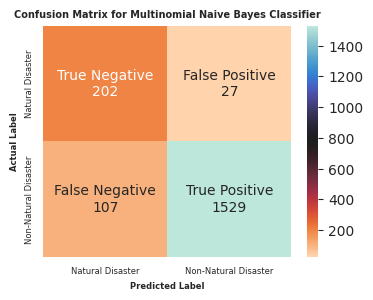

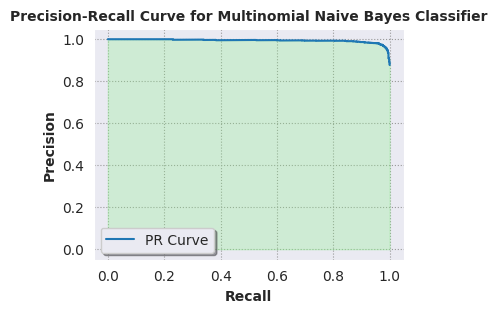

The PR AUC for Multinomial Naive Bayes Classifier is 0.9939



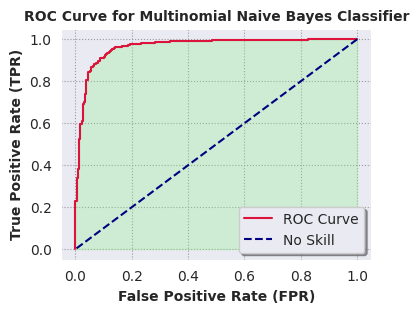

The ROC AUC for Multinomial Naive Bayes Classifier is 0.9649



In [76]:
# predict probabilities on test set
y_scores_mnb = mnb.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_mnb = mnb.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_mnb, 'Multinomial Naive Bayes Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_mnb, 'Multinomial Naive Bayes Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_mnb, 'Multinomial Naive Bayes Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_mnb, 'Multinomial Naive Bayes Classifier')

**Discussions:**

**(A) Classification Report:**

The Multinomial Naive Bayes Classifier achieved an overall accuracy of 93% in classifying natural and non-natural disaster events. For the "Natural Disaster" class, the classifier achieved a precision of 65%, indicating that 65% of the predicted natural disaster events were correctly classified. The recall for this class was 88%, indicating that 88% of the actual natural disaster events were correctly identified by the classifier. The f1-score, which balances precision and recall, was 75% for the "Natural Disaster" class. The "Non-Natural Disaster" class showed excellent performance, with a precision of 98%, recall of 93%, and f1-score of 96%. Overall, the macro-average f1-score was 85%, indicating good performance across both classes. The weighted average f1-score was 93%, demonstrating the classifier's ability to handle imbalanced class distribution.


**(B) Confusion Matrix:**

The confusion matrix shows that the classifier correctly identified 1529 true positive (TP) instances of non-natural disaster events and 202 true negative (TN) instances of natural disaster events. It incorrectly classified 27 instances of natural disaster events as non-natural disaster (false positive, FP) and 107 instances of non-natural disaster events as natural disaster (false negative, FN).

**(C) Precision-Recall Curve:**

The Precision-Recall curve shows a high precision of 0.9939, indicating that the classifier achieves a high true positive rate while keeping false positives low.

**(D) ROC Curve:**

The Receiver Operating Characteristic (ROC) curve also shows a high area under the curve (AUC) value of 0.9939, indicating strong performance in distinguishing between the two classes.

**Conclusion:**

The Multinomial Naive Bayes Classifier demonstrated moderately good performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving high accuracy, precision, recall, f1-scores, and AUC scores.


###### **6.2f: K-Nearest Neighbors (KNN)**
---

The **k-Nearest Neighbors (KNN)** classifier is a simple and intuitive non-parametric algorithm used for both classification and regression tasks. The working principles of the KNN classifier can be summarized as follows:

**1. Data Representation:** The algorithm starts with a labeled dataset in a feature space, where each data point is represented as a vector of features, and each data point is associated with a class label.

**2. Choosing 'k':** The user needs to specify the value of 'k,' which represents the number of nearest neighbors to consider when making predictions. Typically, 'k' is a positive integer, and its choice can impact the performance of the model.

**3. Distance Metric:** To determine the nearest neighbors, a distance metric (e.g., Euclidean distance or Manhattan distance) is used to calculate the distance between the data points in the feature space. The choice of the distance metric affects how the algorithm perceives the similarity between data points.

**4. Finding Neighbors:** For a given data point (the one to be classified or predicted), the KNN algorithm identifies the 'k' data points in the training set that are closest (most similar) to the target data point based on the chosen distance metric.

**5. Majority Voting:** For classification tasks, the KNN classifier employs a majority voting mechanism among the 'k' nearest neighbors to determine the class label of the target data point. The class label with the highest number of occurrences among the neighbors is assigned as the predicted class.


In [77]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", p=2)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

**Call the function to evaluate the KNN classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for KNN Classifier
                      precision    recall  f1-score   support

    natural disaster       0.85      0.38      0.53       229
non-natural disaster       0.92      0.99      0.95      1636

            accuracy                           0.92      1865
           macro avg       0.89      0.69      0.74      1865
        weighted avg       0.91      0.92      0.90      1865




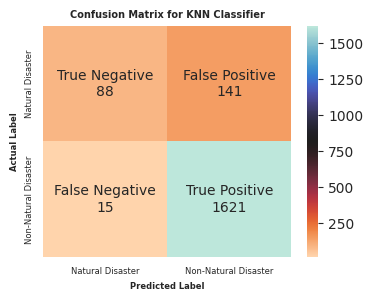

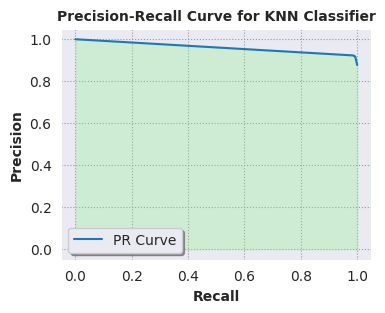

The PR AUC for KNN Classifier is 0.9607



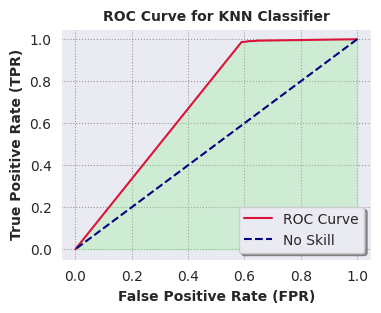

The ROC AUC for KNN Classifier is 0.6995



In [78]:
# predict probabilities on test set
y_scores_knn = knn.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_knn = knn.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_knn, 'KNN Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_knn, 'KNN Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_knn, 'KNN Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_knn, 'KNN Classifier')

**Discussions:**

**(A) Classification Report:**

The KNN Classifier achieved an overall accuracy of 92% in classifying natural and non-natural disaster events. For the "Natural Disaster" class, the classifier achieved a precision of 85%, indicating that 85% of the predicted natural disaster events were correctly classified. The recall for this class was 88%, indicating that 38% of the actual natural disaster events were correctly identified by the classifier. The f1-score, which balances precision and recall, was 53% for the "Natural Disaster" class. The "Non-Natural Disaster" class showed excellent performance, with a precision of 92%, recall of 99%, and f1-score of 95%. Overall, the macro-average f1-score was 74%, indicating good performance across both classes. The weighted average f1-score was 90%, demonstrating the classifier's ability to handle imbalanced class distribution.


**(B) Confusion Matrix:**

The confusion matrix shows that the classifier correctly identified 1621 true positive (TP) instances of non-natural disaster events and 88 true negative (TN) instances of natural disaster events. It incorrectly classified 141 instances of natural disaster events as non-natural disaster (false positive, FP) and 15 instances of non-natural disaster events as natural disaster (false negative, FN).

**(C) Precision-Recall Curve:**

The Precision-Recall curve shows a high precision of 0.9607, indicating that the classifier achieves a high true positive rate while keeping false positives low.

**(D) ROC Curve:**

The Receiver Operating Characteristic (ROC) curve also shows a moderately good area under the curve (AUC) value of 0.6995, indicating moderately strong performance in distinguishing between the two classes.

**Conclusion:**

The KNN Classifier demonstrated poor performance in classifying instances of Natural Disaster and Non-Natural Disaster, achieving acceptable accuracy, precision, recall, f1-scores, and AUC scores.


    Top 3 Classifiers based on F1-Scores for both classes:

    1) Logistic Regression

    2) Random Forest Classifier

    3) Extra Trees Classifier

## **7. Training and Evaluation of Voting Classifier**
---

A **voting classifier** is a machine learning model that combines the predictions of multiple individual classifiers to make a final prediction. It takes advantage of the diversity of different classifiers to improve the overall accuracy and robustness of the predictions.

In a voting classifier, each individual classifier is trained independently on the same dataset or different subsets of the data. These classifiers can be of different types, such as random forest classifier, logistic regression, or extra trees classifier, or they can even be instances of the same type with different parameters or initializations.

Using the **soft voting classifier** approach, each classifier predicts the probability of the input belonging to each class, and uses the uniform weighs, the final prediction is made by averaging the predicted probabilities across all classifiers and selecting the class with the highest average probability. This is suitable for classifiers that can provide probability estimates, such as logistic regression or support vector machines with probability outputs.

The idea behind using a voting classifier is that by combining the predictions of multiple classifiers, it can capture different aspects of the data and reduce the impact of individual classifier biases or errors. It often leads to better generalization and improved performance compared to using a single classifier.

In [79]:
# define the individual classifiers
clf1 = LogisticRegression(C = 1, solver = 'sag', random_state = 42)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 42)
clf3 = ExtraTreesClassifier(n_estimators = 10, random_state = 42)

# train and fit the voting classifier
vc = VotingClassifier(estimators = [('lr', clf1),
                                    ('rfc', clf2),
                                    ('svc', clf3)], voting = 'soft')
vc.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, random_state=42,
                                                 solver='sag')),
                             ('rfc',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42))],
                 voting='soft')

**Call the function to evaluate the voting classifier by displaying the (1) classification report, (2) confusion matrix, (3) precision-recall curve, and (4) ROC-AUC curve.**

Classification Report for Voting Classifier
                      precision    recall  f1-score   support

    natural disaster       0.92      0.86      0.89       229
non-natural disaster       0.98      0.99      0.99      1636

            accuracy                           0.97      1865
           macro avg       0.95      0.93      0.94      1865
        weighted avg       0.97      0.97      0.97      1865




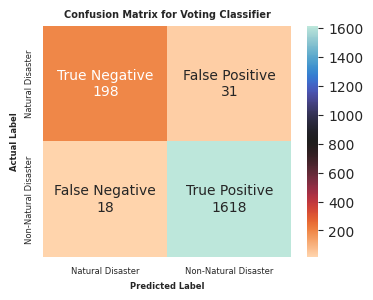

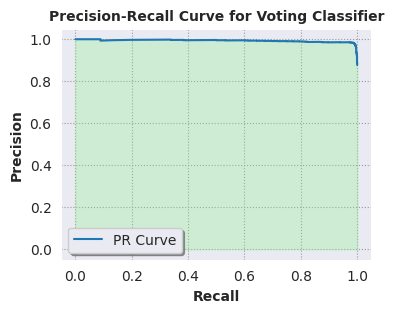

The PR AUC for Voting Classifier is 0.9933



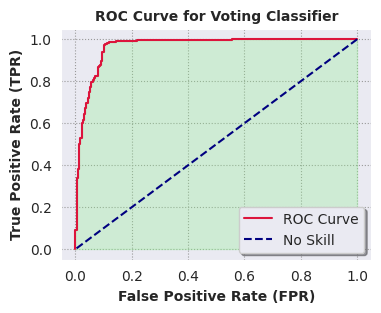

The ROC AUC for Voting Classifier is 0.9659



In [80]:
# predict probabilities on test set
y_scores_vc = vc.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_vc = vc.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_vc, 'Voting Classifier'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_vc, 'Voting Classifier')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_vc, 'Voting Classifier')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_vc, 'Voting Classifier')

**Discussions:**

**(A) Classification Report:**

The Voting Classifier performed well in classifying instances of natural and non-natural disasters. It achieved a precision of 0.92 for the "Natural Disaster" class, indicating that when it predicted an instance as a natural disaster, it was correct 92% of the time. The recall for the same class was 0.86, suggesting that it correctly identified 86% of the actual natural disasters. The f1-score, which combines precision and recall, was 0.89, indicating a good balance between the two metrics. For the "Non-Natural Disaster" class, the precision and recall were higher at 0.98 and 0.99, respectively, indicating excellent performance in classifying non-natural disasters. The overall accuracy of the classifier was 0.97, demonstrating its strong ability to correctly classify instances.


**(B) Confusion Matrix:**

The confusion matrix shows the detailed performance of the Voting Classifier. It correctly predicted 1618 instances as non-natural disasters (true positives) and 198 instances as natural disasters (true negatives). There were 31 instances where it incorrectly classified a non-natural disaster as a natural disaster (false positives), and 18 instances where it mistakenly classified a natural disaster as a non-natural disaster (false negatives).

**(C) Precision-Recall Curve:**

The Precision-Recall AUC (Area Under the Curve) is a measure of the classifier's ability to balance precision and recall across different probability thresholds. The Voting Classifier achieved a high Precision-Recall AUC of 0.9933, indicating its strong performance in correctly identifying instances of both natural and non-natural disasters.

**(D) ROC Curve:**

The ROC-AUC (Receiver Operating Characteristic Area Under the Curve) is a metric that measures the classifier's overall performance across all possible probability thresholds. The Voting Classifier achieved an ROC-AUC of 0.9659, suggesting that it has good discrimination ability in distinguishing between natural and non-natural disasters.

**Conclusion:**

The Voting Classifier demonstrated high accuracy, precision, recall, and f1-score, indicating its effectiveness in classifying instances of natural and non-natural disasters. It showed a strong ability to correctly identify instances and maintain a good balance between precision and recall.


In [81]:
sdsds

NameError: ignored

## **8. Bayes Optimization on Voting Classifier (Estimated Time: ~ 50 mins)**
---

**Bayesian optimization** is a sequential model-based optimization technique used to find the optimal configuration or set of parameters for a given objective function, which is often expensive to evaluate. It combines two important components: a **surrogate model** and an **acquisition function**. The **surrogate model**, typically a Gaussian process, is used to model the unknown objective function and provides a probabilistic estimate of the function's behavior. The **acquisition function** guides the search for the optimal solution by balancing exploration (sampling uncertain regions) and exploitation (focusing on promising areas).

The Bayesian optimization process starts with an **initial set of configurations** that are evaluated to build the surrogate model. The model is then updated **iteratively** by incorporating new observations. At each iteration, the acquisition function is used to suggest a new configuration to evaluate, based on the **trade-off between exploration and exploitation**. The chosen configuration is then evaluated, and the process continues until a termination criterion is met, such as reaching a maximum number of iterations or achieving a satisfactory solution.

One key advantage of Bayesian optimization is its ability to handle **noisy and expensive-to-evaluate functions efficiently**. The surrogate model provides a statistical representation of the objective function, allowing for uncertainty quantification. This uncertainty is then used by the acquisition function to select configurations that have the potential to improve the objective, while also considering the associated uncertainty. By intelligently exploring the search space, Bayesian optimization can **converge to the optimal solution using a minimal number of evaluations**.

**Why choose Bayes Search CV instead Grid Search CV?**

Grid Search CV:

1. Grid Search CV exhaustively searches through a predefined set of hyperparameters, covering all possible combinations.
2. It creates a grid of hyperparameter values and evaluates each combination using cross-validation.
3. While it guarantees finding the optimal hyperparameters within the specified grid, it can be computationally expensive, especially with a large parameter space.

Bayes Search CV:

1. Bayesian Search CV uses probabilistic models to approximate the objective function (typically the model's performance metric) and determine the next set of hyperparameters to evaluate.
2. It models the hyperparameter space and uses the information from past evaluations to guide the search towards more promising regions.
3. This approach is more efficient and requires fewer evaluations compared to Grid Search, making it suitable for complex and high-dimensional hyperparameter spaces.



In [ ]:
# define the individual classifiers
clf1 = LogisticRegression(solver = 'sag', random_state = 42)
clf2 = RandomForestClassifier(random_state = 42)
clf3 = ExtraTreesClassifier(random_state = 42)

# define the param space
param_space = {'lr__C': [1, 2, 3],
               'rfc__n_estimators': [5, 10, 15],
               'etc__n_estimators': [5, 10, 15]}

# define scoring function using the f1-score
f1_scorer = make_scorer(f1_score, average = 'macro')

# define the voting classifier
voting_classifier = VotingClassifier(estimators=[('lr', clf1),
                                                  ('rfc', clf2),
                                                   ('etc', clf3)], voting='soft')

# perform bayes search optimization
optimizer = BayesSearchCV(voting_classifier,
                          param_space,
                          cv=3,
                          scoring = f1_scorer,
                          verbose = 3,
                          n_jobs = 1,
                          return_train_score = True,
                          random_state = 42)
optimizer.fit(X_train_res, y_train_res)

In [ ]:
print("Best Score: ", optimizer.best_score_)
print("Best Parameters: ", optimizer.best_params_)
print("Best Estimators: ", optimizer.best_estimator_)

In [ ]:
# predict probabilities on test set
y_scores_vc_opt = optimizer.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_vc_opt = optimizer.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_vc_opt, 'Voting Classifier (Bayes Optimisation)'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_vc_opt, 'Voting Classifier (Bayes Optimisation)')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_vc_opt, 'Voting Classifier (Bayes Optimisation)')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_vc_opt, 'Voting Classifier (Bayes Optimisation)')

## **9. Re-trained Voting Classifier Model and Evaluation**
---

The objective of retraining a voting classifier using optimized hyperparameters is to create a new and improved model that takes advantage of the best hyperparameter settings found through the optimization process.

Below is the optimized hyperparameters found in previous section:

    Best Score:  0.9935833252976748
    Best Parameters:  {'etc__n_estimators': 5, 'lr__C': 3, 'rfc__n_estimators': 15}

##### **9.1 Re-Trained Voting Classifier using the Optimal Hyperparameters**
---

Defines three individual classifiers (Logistic Regression, Random Forest, and Extra Trees), and then creates a Voting Classifier by combining these individual classifiers. The Voting Classifier is then trained on the specified training data based on the optimized hyperparameters.

In [83]:
# define the individual classifiers
clf1 = LogisticRegression(C = 3, random_state = 42)
clf2 = RandomForestClassifier(n_estimators = 15, random_state = 42)
clf3 = ExtraTreesClassifier(n_estimators = 5, random_state = 42)

# train and fit the voting classifier
vc_opt = VotingClassifier(estimators = [('lr', clf1),
                                    ('rfc', clf2),
                                    ('etc', clf3)], voting = 'soft')
vc_opt.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('lr', LogisticRegression(C=3, random_state=42)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=15,
                                                     random_state=42)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=5,
                                                   random_state=42))],
                 voting='soft')

##### **9.2: Model Evaluation**
---

Evaluates the performance of the voting classifier on the test set by displaying the classification report, confusion matrix, precision-recall curve, and ROC curve.

Classification Report for Voting Classifier (Bayes Optimisation)
                      precision    recall  f1-score   support

    natural disaster       0.93      0.85      0.89       229
non-natural disaster       0.98      0.99      0.99      1636

            accuracy                           0.97      1865
           macro avg       0.96      0.92      0.94      1865
        weighted avg       0.97      0.97      0.97      1865




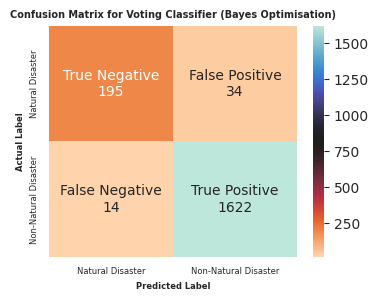

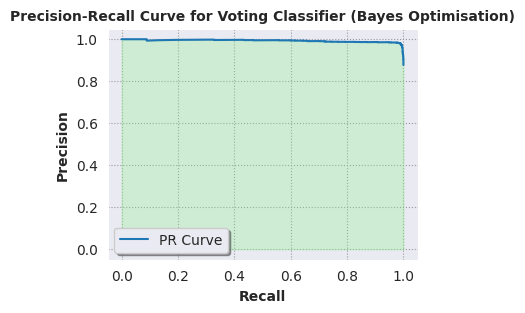

The PR AUC for Voting Classifier (Bayes Optimisation) is 0.9931



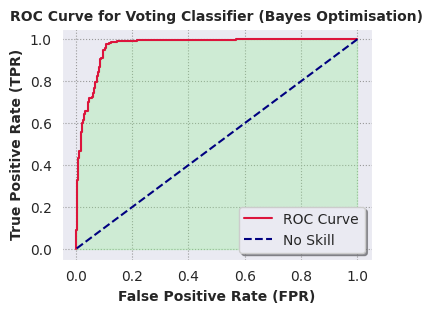

The ROC AUC for Voting Classifier (Bayes Optimisation) is 0.9646



In [84]:
# predict probabilities on test set
y_scores_vc_opt = vc_opt.predict_proba(X_test_tfidf)[:, 1]
# predict classes on test set
y_classes_vc_opt = vc_opt.predict(X_test_tfidf)

# call the function to display the classification report
print(model_classification_report(y_test, y_classes_vc_opt, 'Voting Classifier (Bayes Optimisation)'))
print()

# call the function to display the confusion matrix
display_conf_matrix(y_test, y_classes_vc_opt, 'Voting Classifier (Bayes Optimisation)')

# call the function to display the precision-recall curve
display_pr_curve(y_test, y_scores_vc_opt, 'Voting Classifier (Bayes Optimisation)')

# call the function to display the roc-auc curve
display_roc_curve(y_test, y_scores_vc_opt, 'Voting Classifier (Bayes Optimisation)')

**Discussions:**

**(A) Classification Report:**

The Voting Classifier shows a strong performance with an overall accuracy of 97%. For the "Natural Disaster" class, the precision is 93%, indicating that 93% of the predicted "Natural Disaster" instances are actually correct. The recall is 85%, meaning that 85% of the actual "Natural Disaster" instances are correctly identified. The F1-score, which combines precision and recall, is 89% for this class.

For the "Non-Natural Disaster" class, the precision is 98%, indicating a high level of accuracy in predicting this class. The recall is 99%, meaning that the model correctly identifies 99% of the actual "Non-Natural Disaster" instances. The F1-score for this class is 99%, indicating excellent performance.


**(B) Confusion Matrix:**

The confusion matrix provides further insights into the model's performance. There are 1622 true positive (TP) predictions for the "Non-Natural Disaster" class, meaning 1622 instances were correctly classified as "Non-Natural Disaster". There are 195 true negative (TN) predictions for the "Natural Disaster" class, meaning 195 instances were correctly classified as "Natural Disaster". The model made 34 false positive (FP) predictions, classifying 34 instances as "Non-Natural Disaster" when they were actually "Natural Disaster". There are 14 false negative (FN) predictions, indicating that 14 instances were mistakenly classified as "Natural Disaster" when they were "Non-Natural Disaster".

**(C) Precision-Recall Curve:**

The Precision-Recall Area Under Curve (AUC) score is 0.9931, indicating high precision and recall rates across different classification thresholds. This suggests that the model achieves a good balance between correctly identifying positive instances and minimizing false positives.

**(D) ROC Curve:**

The Receiver Operating Characteristic (ROC) AUC score is 0.9646, indicating a high level of discrimination between the two classes. The model performs well in distinguishing between "Natural Disaster" and "Non-Natural Disaster" instances, with a high true positive rate and a low false positive rate.


**Conclusion:**

The Voting Classifier demonstrated high accuracy, precision, recall, and f1-score, indicating its effectiveness in classifying instances of natural and non-natural disasters. It showed a strong ability to correctly identify instances and maintain a good balance between precision and recall.


##### **9.3 Save the model**
---

Saves the voting classifier model as a serialized object into a file using the pickle module. This allows the model to be stored and later loaded for future use or deployment.

In [85]:
import pickle

# set the filepath to save the model
filepath = '/content/drive/My Drive/SDVLA/nlp/capstone_project/voting_classifier.pkl'
# save the voting classifier model using pickle
with open(filepath, 'wb') as file:
    pickle.dump(vc_opt, file)


## **10. Deploy a Voting Classifier Model on Gradio**
---

The objective of deployment and integration with a Gradio app for a voting classifier model is to make the model accessible and usable by end-users through a user-friendly interface. Gradio is a Python library that allows you to quickly create custom UI components for your machine learning models.

##### **10.1 Load the model**
---

Reads the serialized voting classifier model from the specified file using pickle and loads it into memory for further usage or evaluation.

In [86]:
import pickle
# set the filepath to load the model
filepath = '/content/drive/My Drive/SDVLA/nlp/capstone_project/voting_classifier.pkl'
# load the voting classifier model using pickle
with open(filepath, 'rb') as file:
    loaded_voting_classifier = pickle.load(file)

In [87]:
fpath1 = "/content/drive/My Drive/SDVLA/nlp/capstone_project/cleaned_trained_text.csv"
df_text = pd.read_csv(fpath1).dropna(axis = 0)

##### **10.2 Deployment and Integration with Gradio**
---

Defines a function that preprocesses and classifies input tweets using a loaded voting classifier and TF-IDF vectorizer. It then creates a Gradio interface to provide a user-friendly way for users to interact with the model and get classification results for their input tweets.

In [88]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [89]:
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer

def predictDisaster(input_tweets):
  # call the function to perform various preprocessing text
  input_tweets = lowercase_normalization(input_tweets)
  input_tweets = remove_twitter_handle(input_tweets)
  input_tweets = remove_unusual_text_sequences(input_tweets)
  input_tweets = remove_url_hyperlinks(input_tweets)
  input_tweets = remove_months_abbre(input_tweets)
  input_tweets = remove_newline_char(input_tweets)
  input_tweets = remove_non_ascii_char(input_tweets)
  input_tweets = contractions_expansion(input_tweets)
  input_tweets = convert_emoji_emoticon_to_words(input_tweets)
  input_tweets = remove_punctuations(input_tweets)
  input_tweets = abbreviation_conversion(input_tweets)
  input_tweets = remove_digits(input_tweets)
  input_tweets = remove_stopwords(input_tweets)
  input_tweets = lemmatization(input_tweets)
  input_tweets = filter_words_less_than_3_characters(input_tweets)
  input_tweets = remove_consecutive_duplicate_words(input_tweets)

  # initialize TF-IDF vectorizer
  tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 3))
  # fit the vectorizer on training data
  tfidf_vectorizer.fit(df_text['text'])
  # transform the pre-processed input_tweets into TF-IDF features
  tweet_tfidf = tfidf_vectorizer.transform([input_tweets])
  # predict the disaster class label
  predict_disaster = loaded_voting_classifier.predict(tweet_tfidf)
  # predict the class probabilities
  predict_disaster_proba = loaded_voting_classifier.predict_proba(tweet_tfidf)
  # determine the disaster label and disasters probability based on the prediction
  if predict_disaster == "natural disaster":
    disaster_label = "This is a natural disaster tweet!"
    disaster_probability = predict_disaster_proba[0][0]*100
    non_disaster_probability = 100 - disaster_probability
  else:
    disaster_label = "This is a non-natural disaster tweet!"
    non_disaster_probability = predict_disaster_proba[0][1]*100
    disaster_probability = 100 - non_disaster_probability
  return disaster_label, disaster_probability, non_disaster_probability

# create a Gradio interface
face = gr.Interface(fn=predictDisaster,
                    inputs=gr.inputs.Textbox(lines=5, placeholder="Name Here… ", label = "Enter your tweets:"),
                    outputs= [gr.outputs.Textbox(label = "Tweet Classification: "),
                              gr.outputs.Textbox(label = "Predicted Probability (Natural Disaster Classification) (%): "),
                              gr.outputs.Textbox(label = "Predicted Probability (Non-Natural Disaster Classification) (%): ")])
face.launch() # launch the Gradio app

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## **11. Should we consider voting classifier as an alternative choice for the text classification instead of using the advanced deep learning algorithms such as BiLSTM, etc?**
---

Since the voting classifier has performed exceptionally well on unseen data and here are some factors that we should consider for voting classifier over advanced deep learning models:

1. Consider the complexity and interpretability of the models. A voting classifier is typically an ensemble model that combines the predictions of multiple base classifiers, which include logistic regression, extra trees, and even random forest. This ensemble approach might provide better interpretability compared to the biLSTM, which is a deep learning model with complex internal representations.

2. Consider the computational resources and scalability requirements of the models. Deep learning models such as biLSTMs, can be computationally expensive and require specialized hardware and infrastructure. On the other hand, a voting classifier with simpler base classifier might be more computationally efficient and easier to scale.

3. Consider the generalization capabilities on the uneseen data and transfer learning scenarios. Deep learning models can learn complex patterns and reprensentations well from the data, potentially allowing them to generalize well to similar tasks or domains. However, a voting classifier with diverse base classifiers has also offer good generalization capabilities.



## **References**
---



1) *sklearn.preprocessing.LabelEncoder — scikit-learn 0.22.1 documentation.* (2019). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

‌2) *sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation.* (2018). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

‌3) *scikit-learn. (2019). sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation.* Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

‌4) *Scikit learn. (2018). sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.20.3 documentation.* Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

‌5) *scikit-learn developers. (2014). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation.* Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

‌6) *Scikit-learn. (2018). 3.2.4.3.1. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation.* Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

‌7) *3.2.4.3.3. sklearn.ensemble.ExtraTreesClassifier — scikit-learn 0.22.2 documentation.* (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

‌8) *3.2.4.3.5. sklearn.ensemble.GradientBoostingClassifier — scikit-learn 0.20.3 documentation.* (2009). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

‌9) *sklearn.naive_bayes.MultinomialNB — scikit-learn 0.22 documentation.* (2019). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

‌10) *sklearn.naive_bayes.MultinomialNB — scikit-learn 0.22 documentation.* (2019). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

‌11) *sklearn.metrics.classification_report — scikit-learn 0.20.3 documentation.* (2018). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

‌12) *scikit-learn. (2019). sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation. Scikit-Learn.org.* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

‌13) *sklearn.metrics.roc_auc_score — scikit-learn 0.23.2 documentation.* (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

‌14) *sklearn.metrics.roc_curve — scikit-learn 0.23.0 documentation.* (n.d.). Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

‌15) *sklearn.metrics.precision_recall_curve. (n.d.). Scikit-Learn.* Retrieved July 28, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

‌16) *skopt.BayesSearchCV — scikit-optimize 0.8.1 documentation.* (n.d.). Scikit-Optimize.github.io. Retrieved July 28, 2023, from https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

‌17) *SMOTETomek — Version 0.11.0. (n.d.). Imbalanced-Learn.org.* Retrieved July 28, 2023, from https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html

‌18) *OpenAI.* (2023). ChatGPT (July 20 version) [Large language model]. https://chat.openai.com/chat